<a href="https://colab.research.google.com/github/springboardmentor891v/CreditPathAI/blob/Rajath/notebooks/eda_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
df = pd.read_csv('../Loan_default.csv')



In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style('whitegrid')

In [10]:
print("Data Shape:")
print(df.shape)
print("\nData Info:")
df.info()

Data Shape:
(148670, 34)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float

In [11]:
df.head()


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [12]:
print(df.isnull().sum())

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

# Task
Generate an EDA report for the file "eda_report". The report should include visualizations and analysis of relationships between columns, with each section presented in separate cells.

## Data cleaning and preprocessing

### Subtask:
Address missing values and potential data inconsistencies.


**Reasoning**:
I need to handle the missing values in the columns identified in the previous step. I will impute the missing values based on the nature of each column. For numerical columns, I will use the median, and for categorical columns, I will use the mode. I will also check for data type inconsistencies in the 'age' column.



In [13]:
# Impute missing values
for col in ['rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'property_value', 'income', 'LTV', 'dtir1']:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

for col in ['loan_limit', 'approv_in_adv', 'loan_purpose', 'term', 'Neg_ammortization', 'age', 'submission_of_application']:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)

# Check and correct data types for 'age' column

print("Unique values in 'age' column before cleaning:")
print(df['age'].unique())

mode_age = df['age'].mode()[0]
df['age'].fillna(mode_age, inplace=True)

# Re-check for missing values
print("\nMissing values after imputation:")
print(df.isnull().sum())



C:\Users\pavan\AppData\Local\Temp\ipykernel_14120\3222170735.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
C:\Users\pavan\AppData\Local\Temp\ipykernel_14120\3222170735.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

Unique values in 'age' column before cleaning:
['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<25']

Missing values after imputation:
ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                         

## Univariate analysis

### Subtask:
Analyze individual features using appropriate visualizations and summary statistics.


**Reasoning**:
Generate descriptive statistics for numerical columns and frequency counts for categorical columns to understand the distributions and characteristics of individual features.



In [14]:
# Generate descriptive statistics for numerical columns
print("Descriptive Statistics for Numerical Columns:")
display(df.describe())

# Generate frequency counts for categorical columns
print("\nFrequency Counts for Categorical Columns:")
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nFrequency counts for '{col}':")
    display(df[col].value_counts())

Descriptive Statistics for Numerical Columns:


,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,148670.000000,148670.000000,148670.000000,148670.000000,1.486700e+05,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000
mean,99224.500000,2019.0,3.311177e+05,4.031879,0.429024,3057.397919,335.143438,4.897800e+05,6883.647811,699.789103,72.989111,0.246445,37.938508
std,42917.476598,0.0,1.839093e+05,0.488348,0.445907,2797.972965,58.402488,3.420221e+05,6300.067060,115.875857,37.890714,0.430942,9.663417
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.750000,0.181500,1250.000000,360.000000,2.880000e+05,3840.000000,599.000000,63.297872,0.000000,33.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.250000,0.620000,3889.495000,360.000000,5.980000e+05,8280.000000,800.000000,84.722222,0.000000,44.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000



Frequency Counts for Categorical Columns:

Frequency counts for 'loan_limit':


loan_limit
cf     138692
ncf      9978
Name: count, dtype: int64


Frequency counts for 'Gender':


Gender
Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: count, dtype: int64


Frequency counts for 'approv_in_adv':


approv_in_adv
nopre    125529
pre       23141
Name: count, dtype: int64


Frequency counts for 'loan_type':


loan_type
type1    113173
type2     20762
type3     14735
Name: count, dtype: int64


Frequency counts for 'loan_purpose':


loan_purpose
p3    56068
p4    54799
p1    34529
p2     3274
Name: count, dtype: int64


Frequency counts for 'Credit_Worthiness':


Credit_Worthiness
l1    142344
l2      6326
Name: count, dtype: int64


Frequency counts for 'open_credit':


open_credit
nopc    148114
opc        556
Name: count, dtype: int64


Frequency counts for 'business_or_commercial':


business_or_commercial
nob/c    127908
b/c       20762
Name: count, dtype: int64


Frequency counts for 'Neg_ammortization':


Neg_ammortization
not_neg    133541
neg_amm     15129
Name: count, dtype: int64


Frequency counts for 'interest_only':


interest_only
not_int     141560
int_only      7110
Name: count, dtype: int64


Frequency counts for 'lump_sum_payment':


lump_sum_payment
not_lpsm    145286
lpsm          3384
Name: count, dtype: int64


Frequency counts for 'construction_type':


construction_type
sb    148637
mh        33
Name: count, dtype: int64


Frequency counts for 'occupancy_type':


occupancy_type
pr    138201
ir      7340
sr      3129
Name: count, dtype: int64


Frequency counts for 'Secured_by':


Secured_by
home    148637
land        33
Name: count, dtype: int64


Frequency counts for 'total_units':


total_units
1U    146480
2U      1477
3U       393
4U       320
Name: count, dtype: int64


Frequency counts for 'credit_type':


credit_type
CIB     48152
CRIF    43901
EXP     41319
EQUI    15298
Name: count, dtype: int64


Frequency counts for 'co-applicant_credit_type':


co-applicant_credit_type
CIB    74392
EXP    74278
Name: count, dtype: int64


Frequency counts for 'age':


age
45-54    34920
35-44    32818
55-64    32534
65-74    20744
25-34    19142
>74       7175
<25       1337
Name: count, dtype: int64


Frequency counts for 'submission_of_application':


submission_of_application
to_inst     96014
not_inst    52656
Name: count, dtype: int64


Frequency counts for 'Region':


Region
North         74722
south         64016
central        8697
North-East     1235
Name: count, dtype: int64


Frequency counts for 'Security_Type':


Security_Type
direct      148637
Indriect        33
Name: count, dtype: int64

**Reasoning**:
Create histograms for key numerical features and bar plots for key categorical features to visualize their distributions.



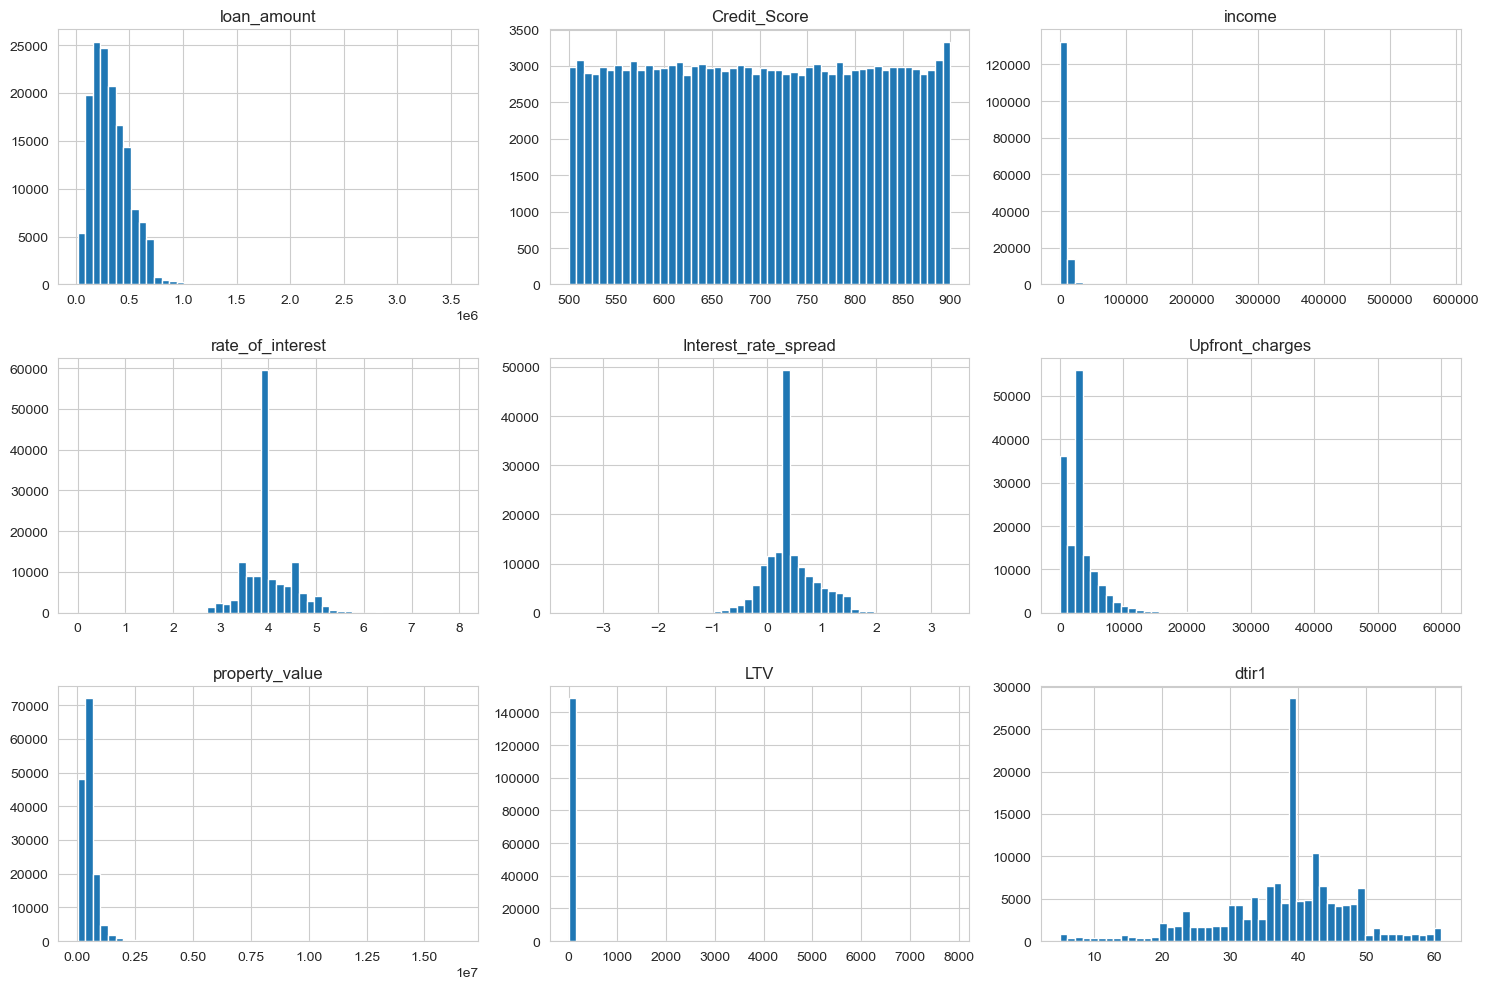

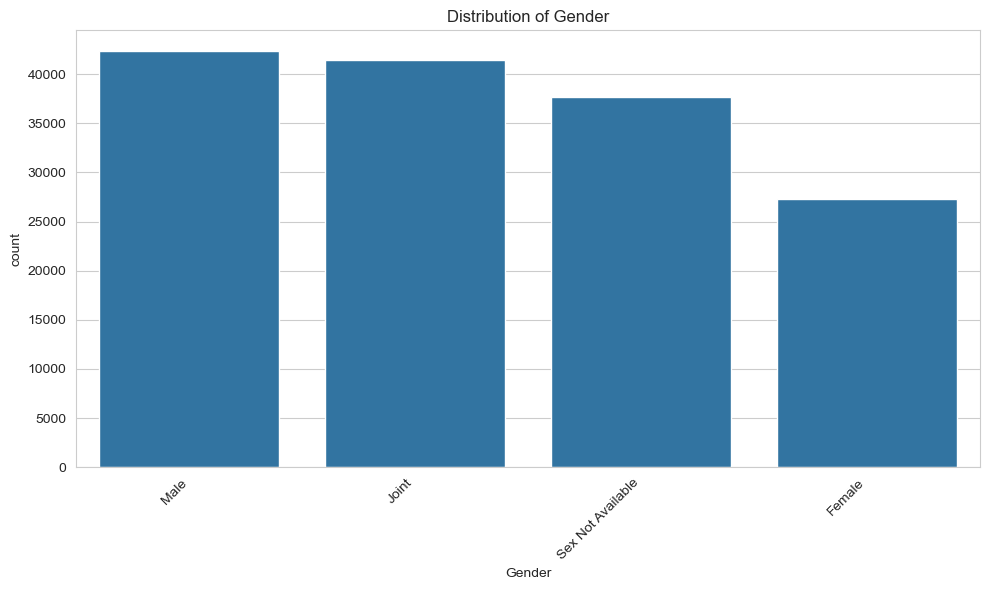

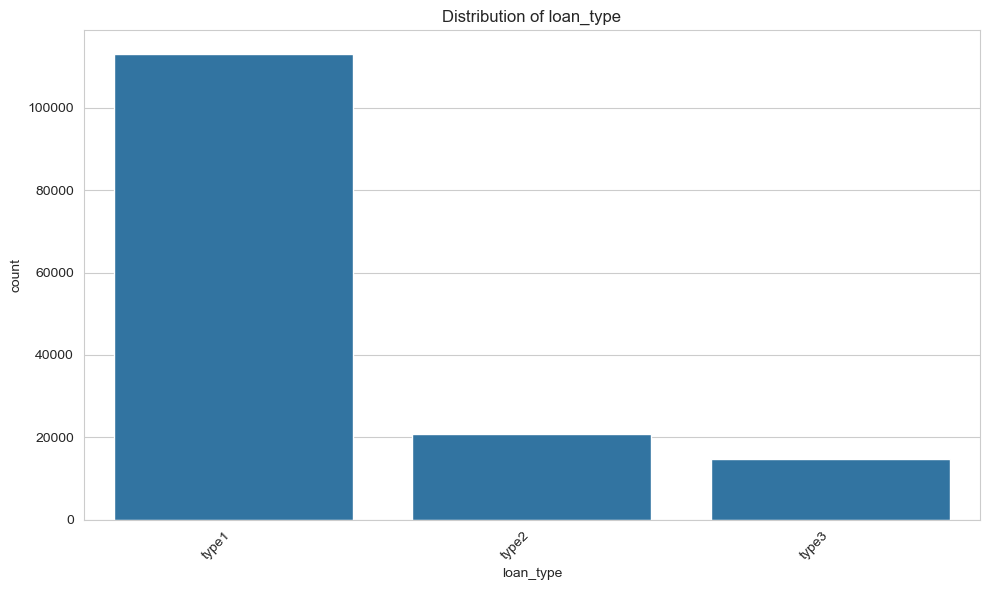

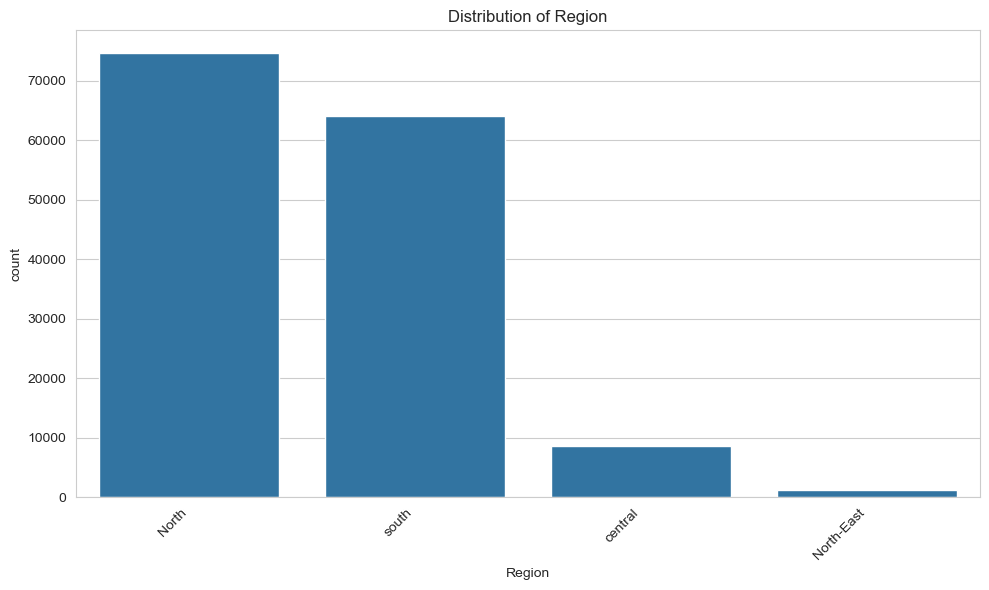

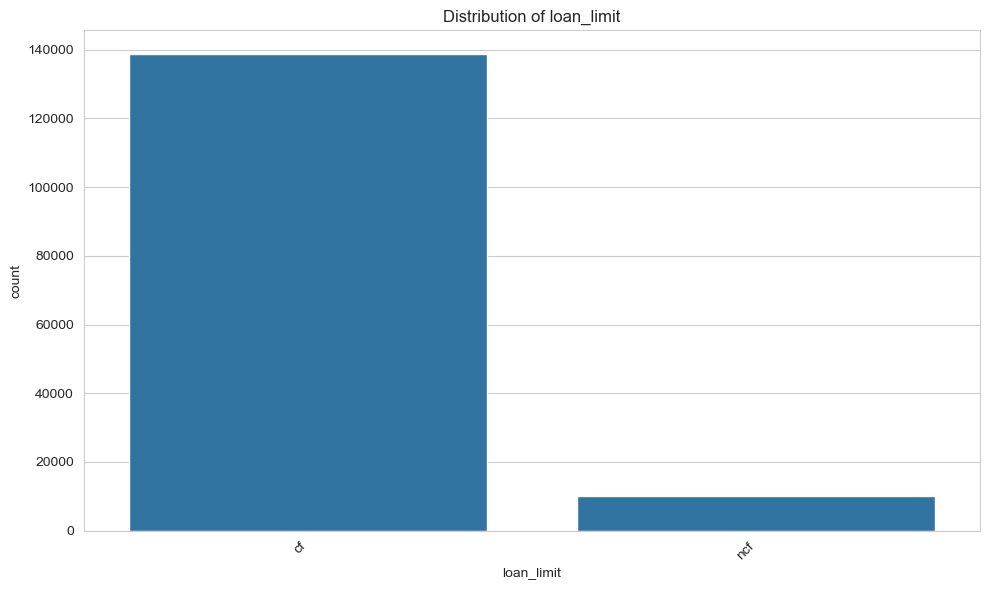

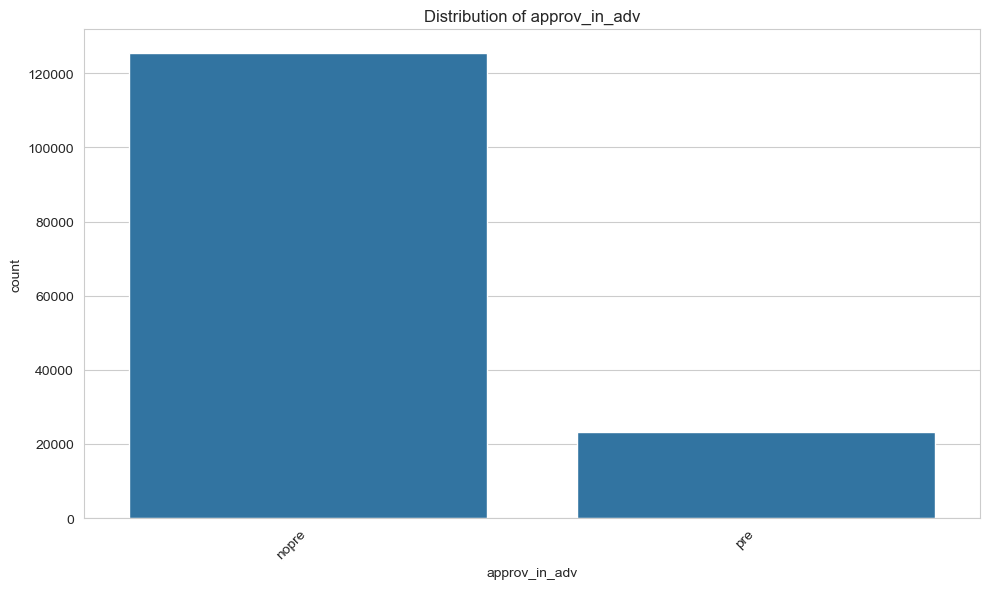

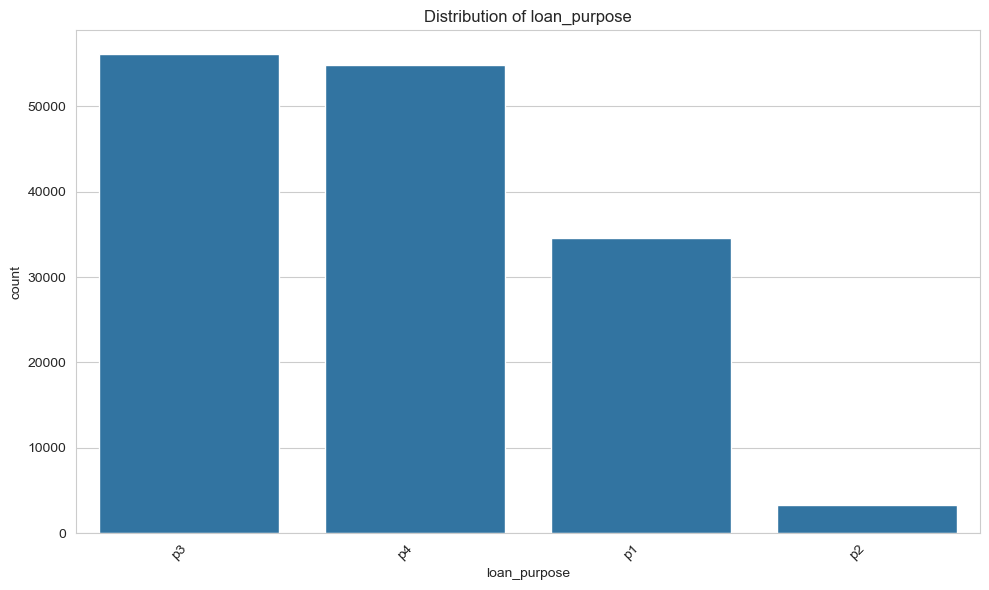

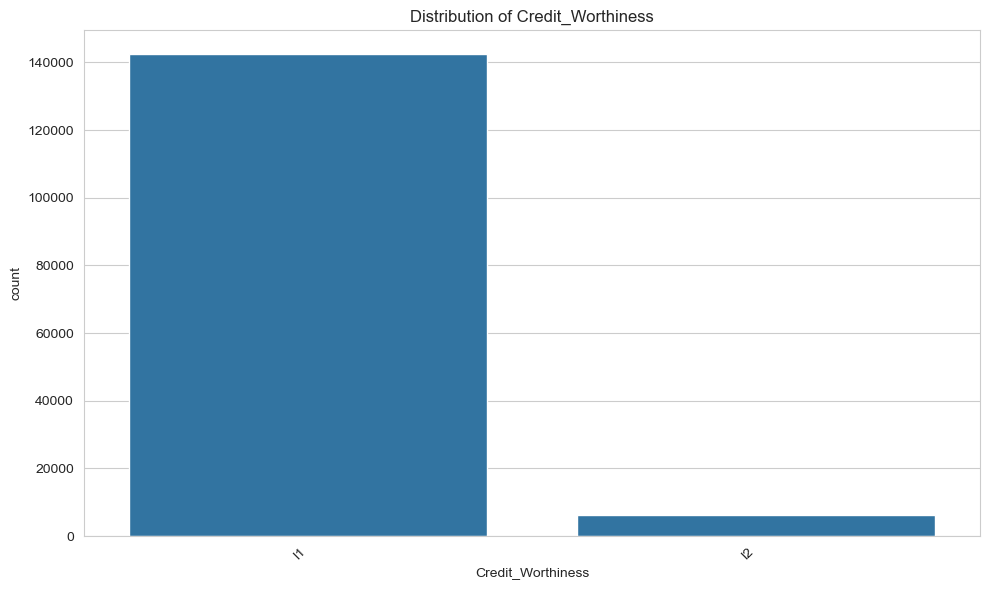

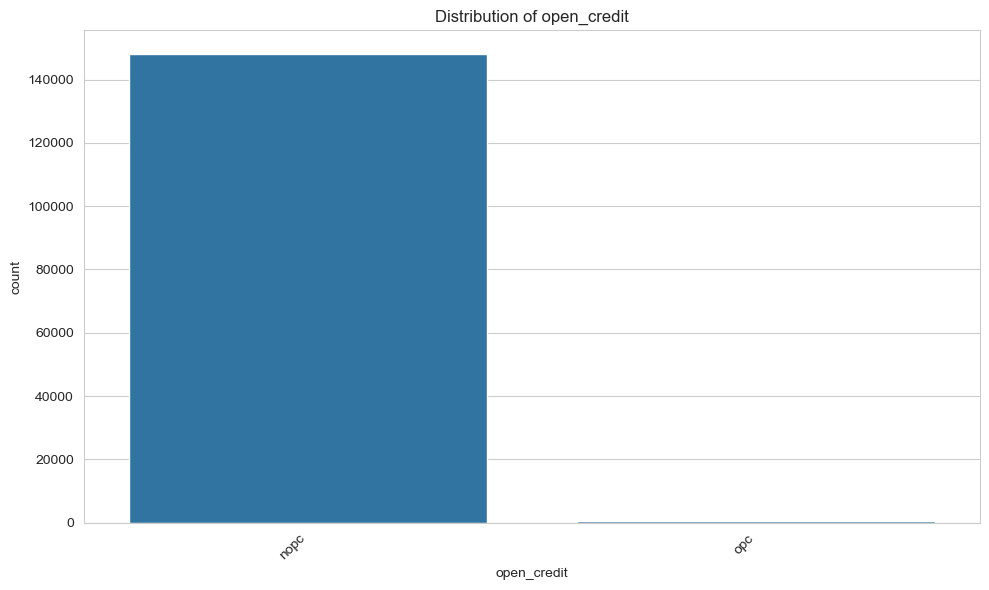

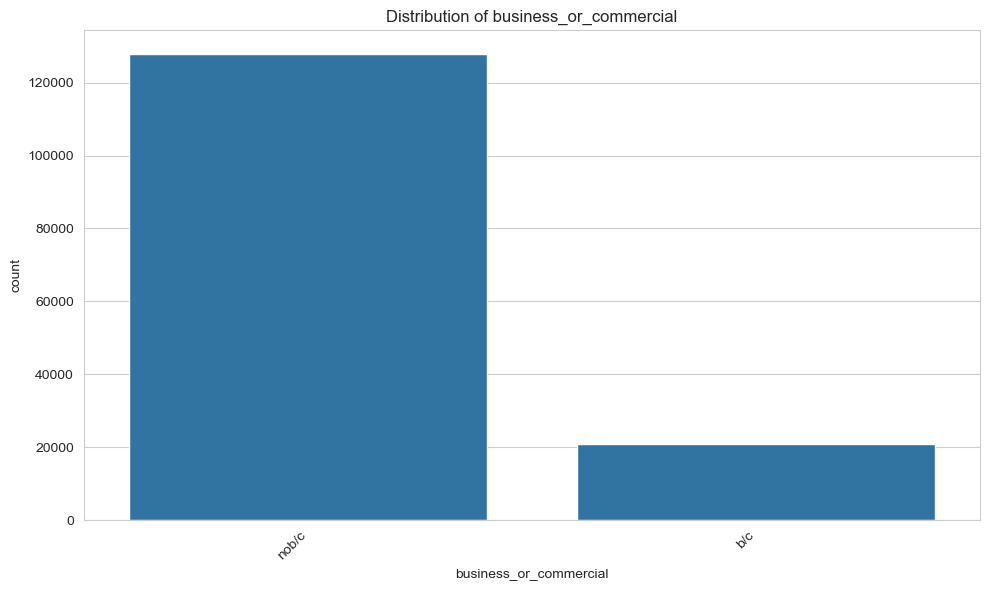

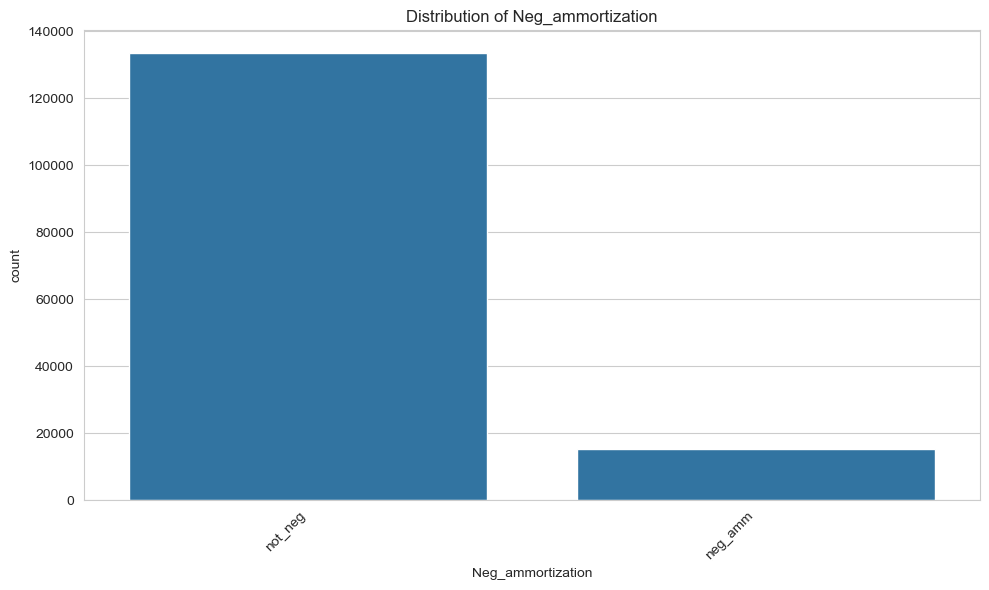

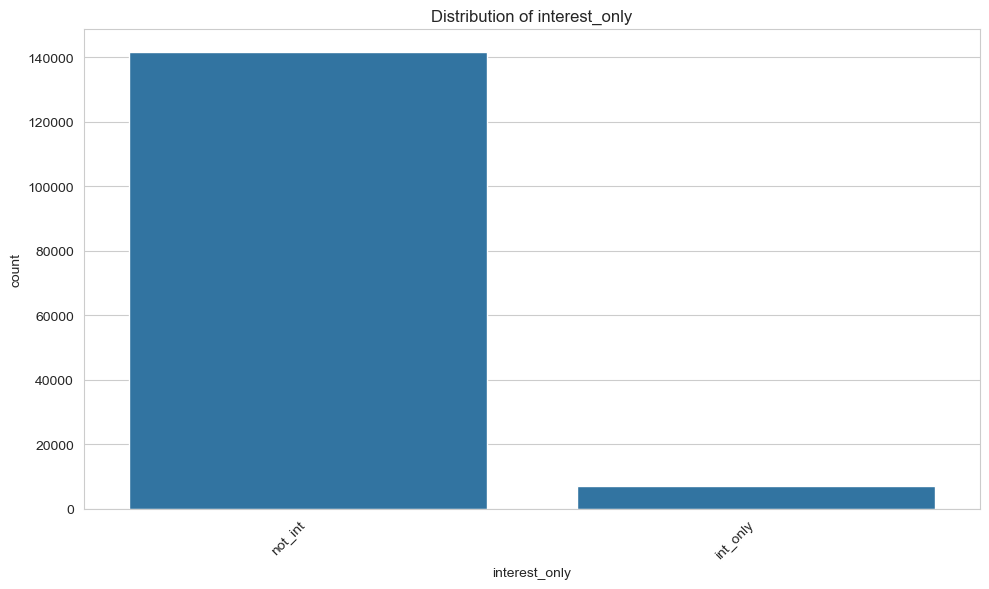

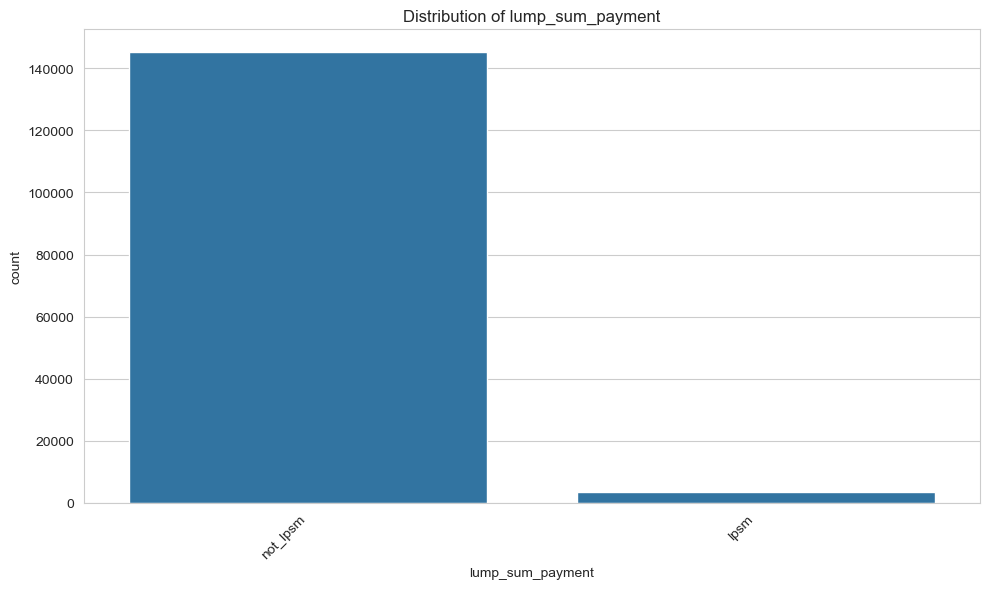

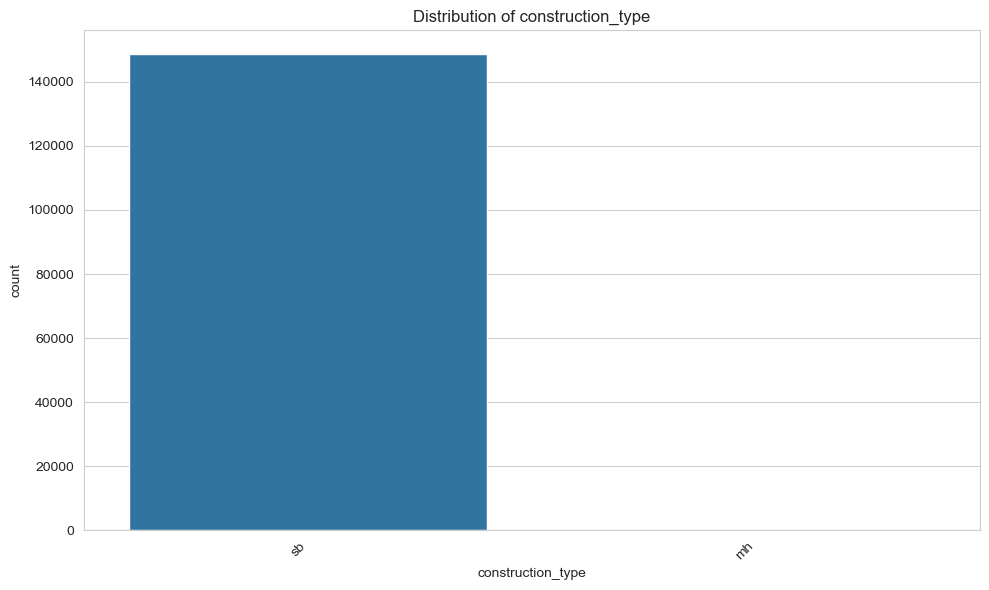

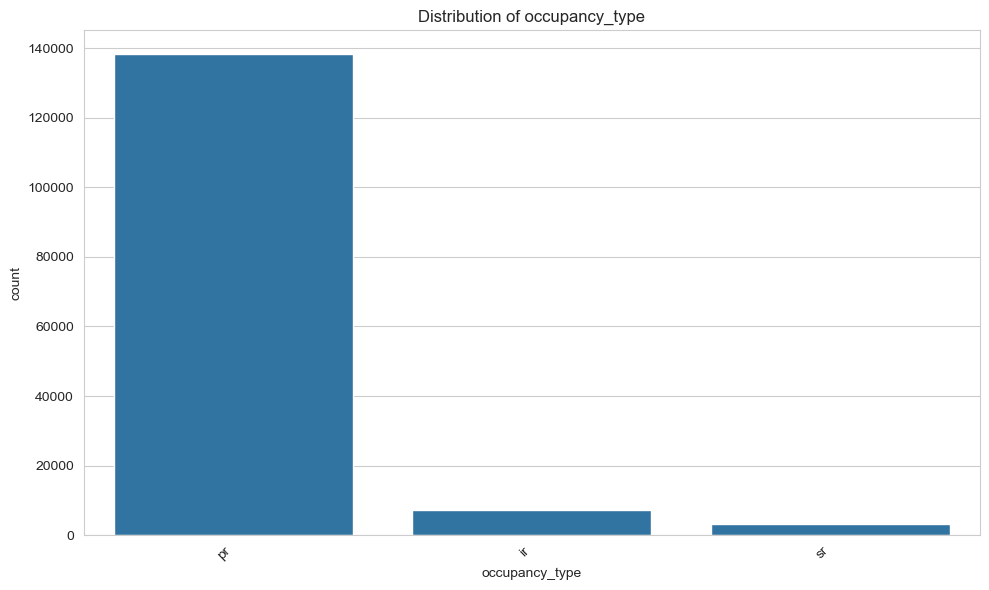

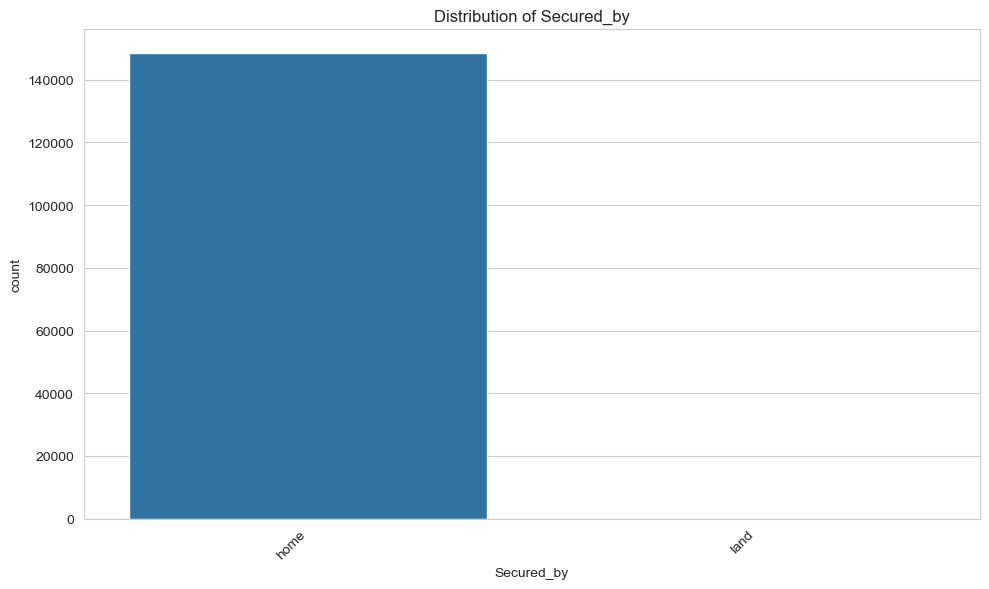

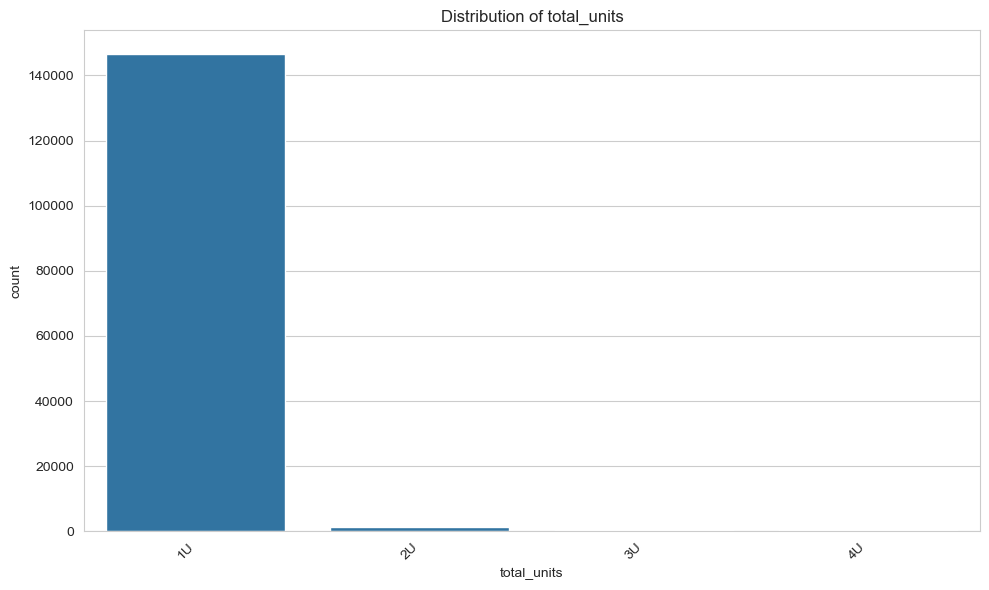

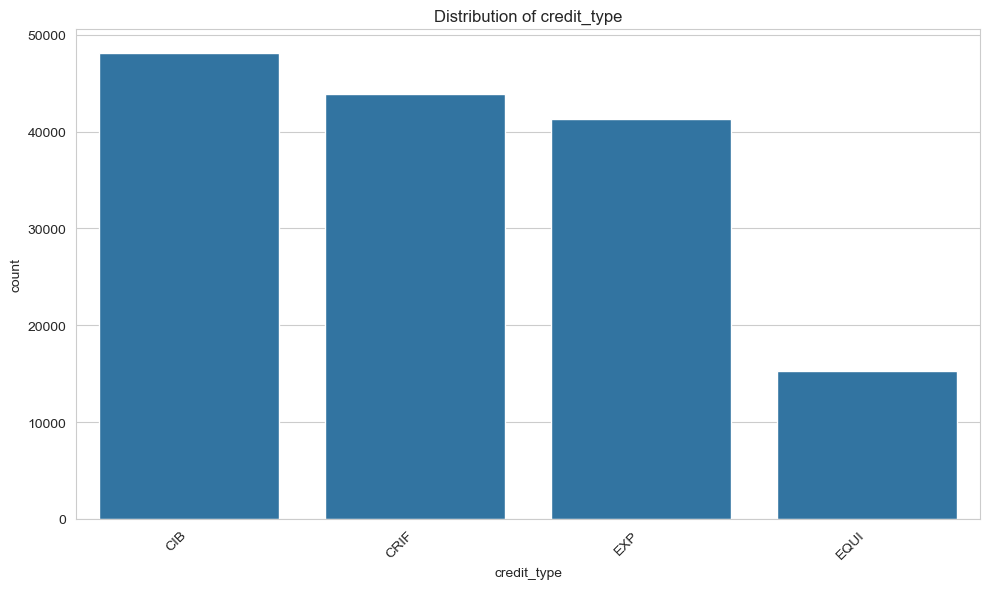

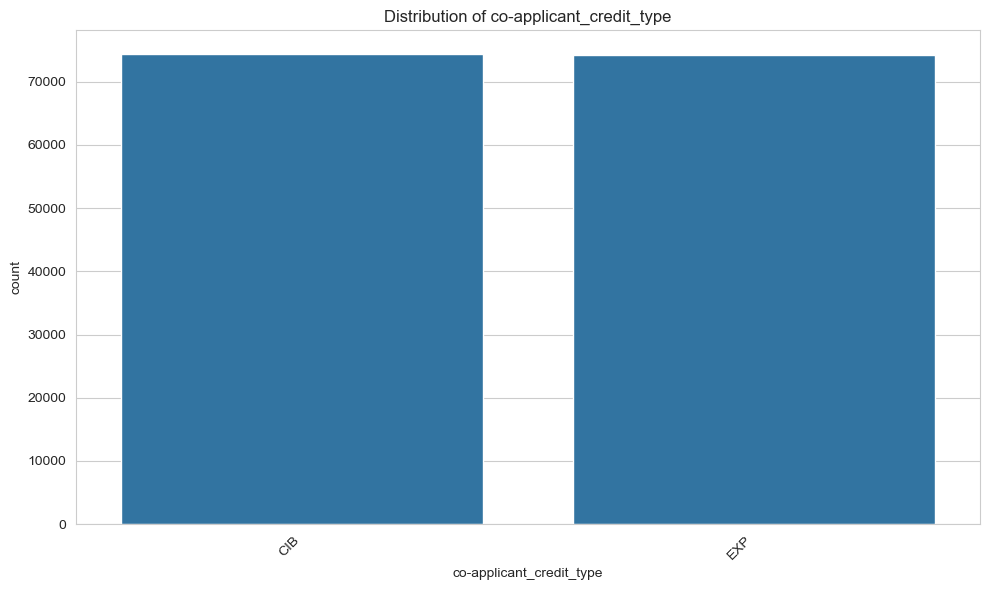

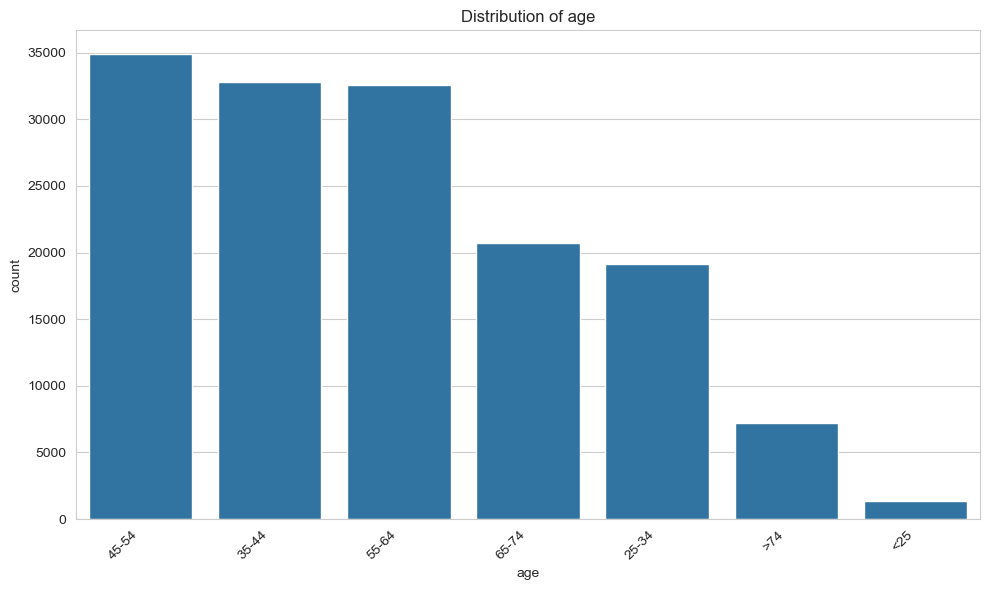

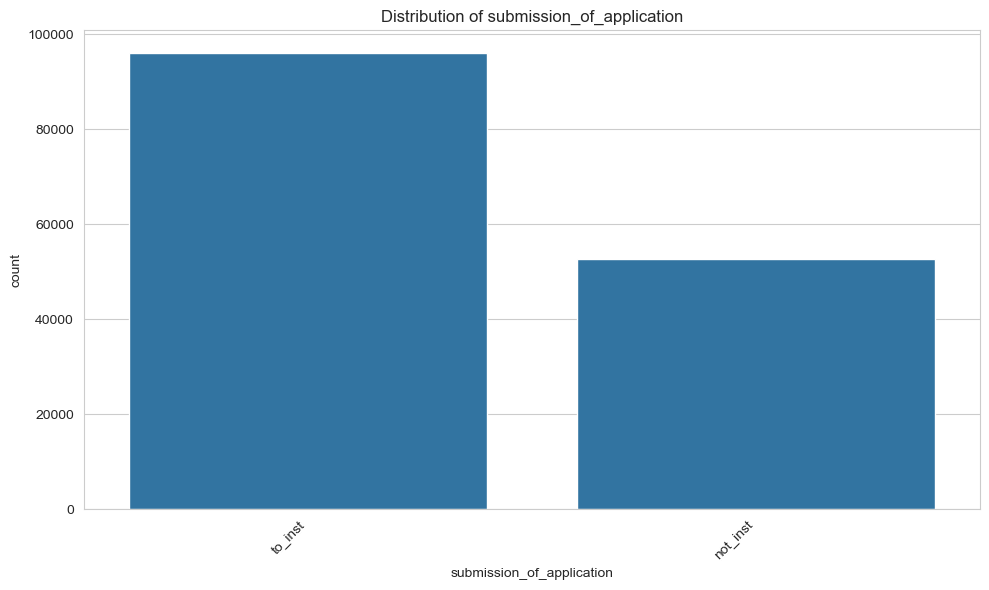

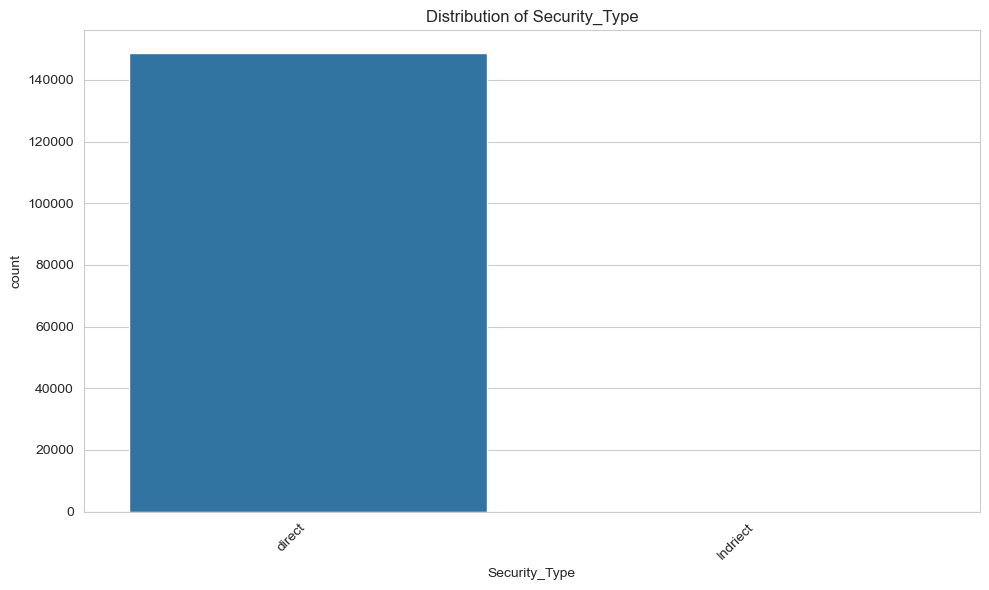

In [15]:
# Create histograms for key numerical features
numerical_features = ['loan_amount', 'Credit_Score', 'income', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'property_value', 'LTV', 'dtir1']
df[numerical_features].hist(figsize=(15, 10), bins=50)
plt.tight_layout()
plt.show()

# Create bar plots for key categorical features
categorical_features = ['Gender', 'loan_type', 'Region', 'loan_limit', 'approv_in_adv', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'Security_Type']
for col in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Bivariate analysis

### Subtask:
Explore relationships between pairs of features using scatter plots, box plots, or other relevant visualizations.


**Reasoning**:
Create scatter plots for numerical features vs the target variable 'Status'.



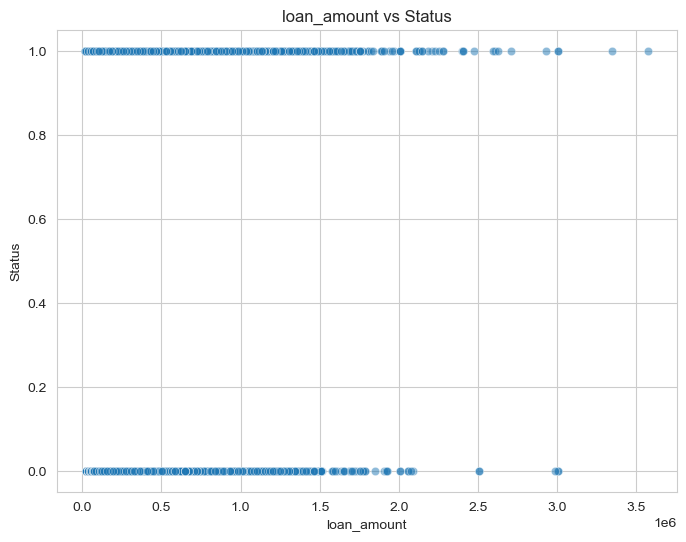

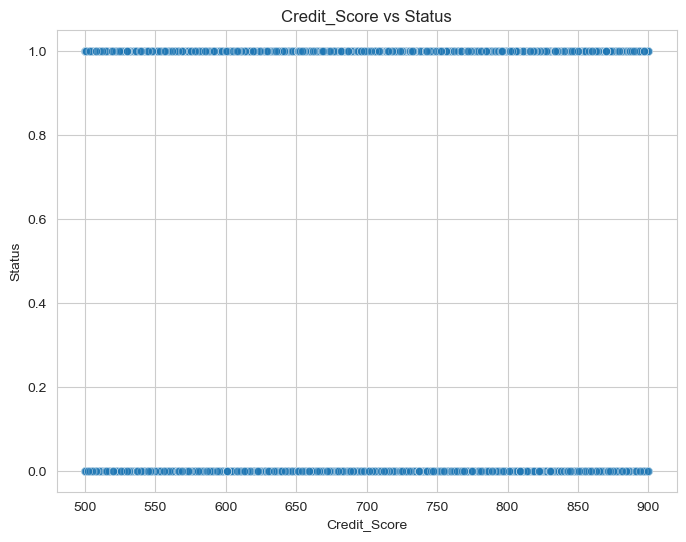

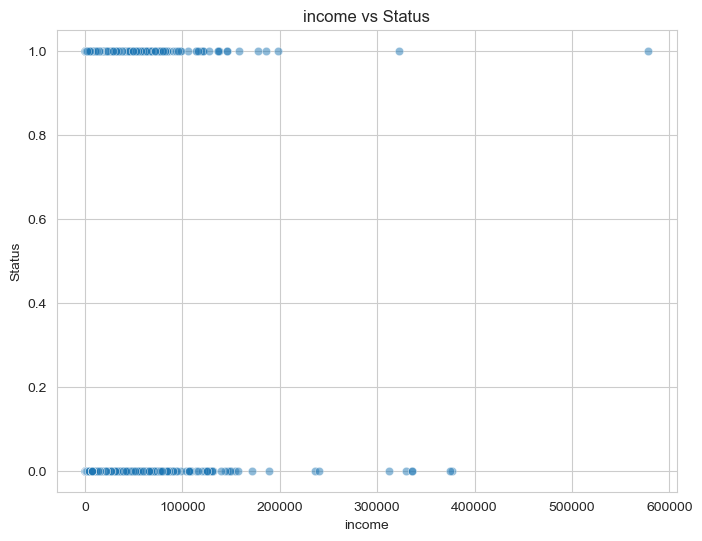

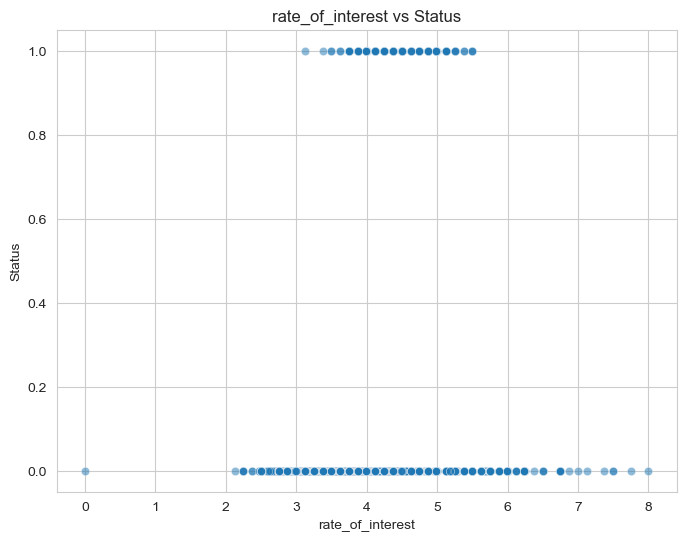

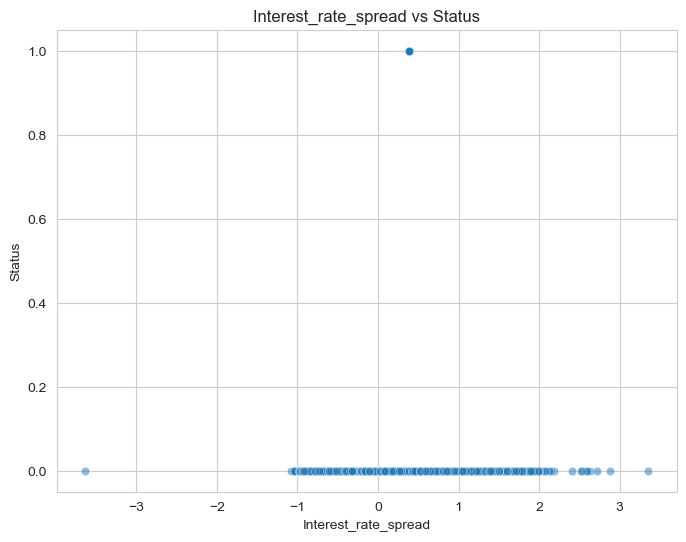

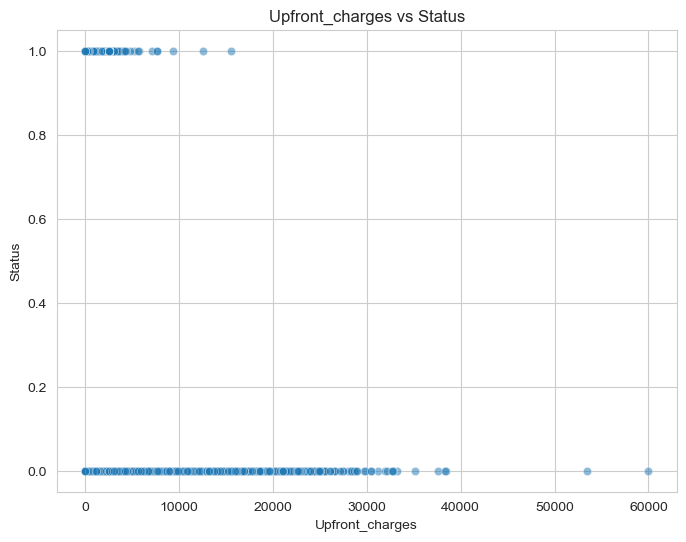

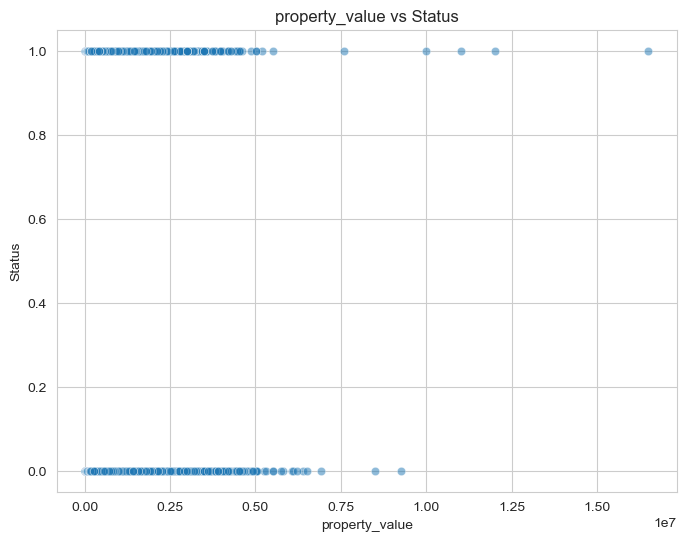

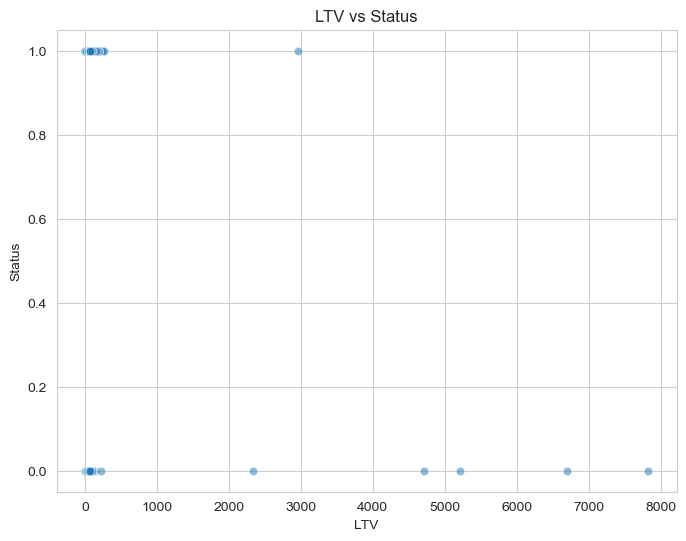

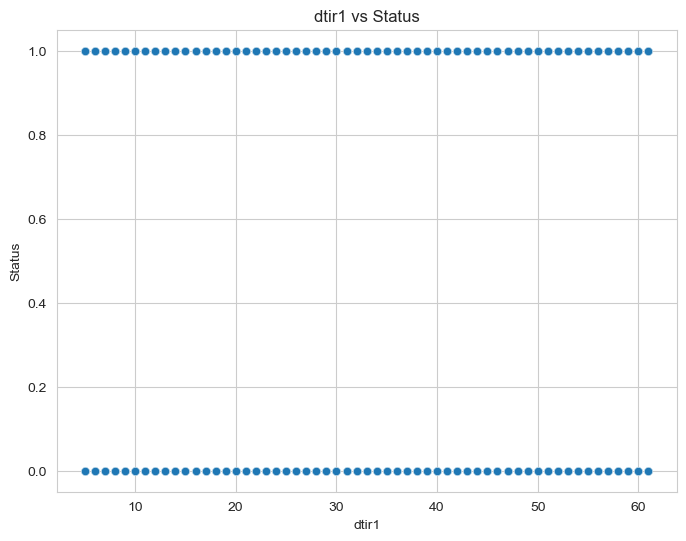

In [16]:
numerical_features = ['loan_amount', 'Credit_Score', 'income', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'property_value', 'LTV', 'dtir1']
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=col, y='Status', alpha=0.5)
    plt.title(f'{col} vs Status')
    plt.xlabel(col)
    plt.ylabel('Status')
    plt.show()

**Reasoning**:
Generate box plots to examine the relationship between categorical features and the target variable 'Status'.



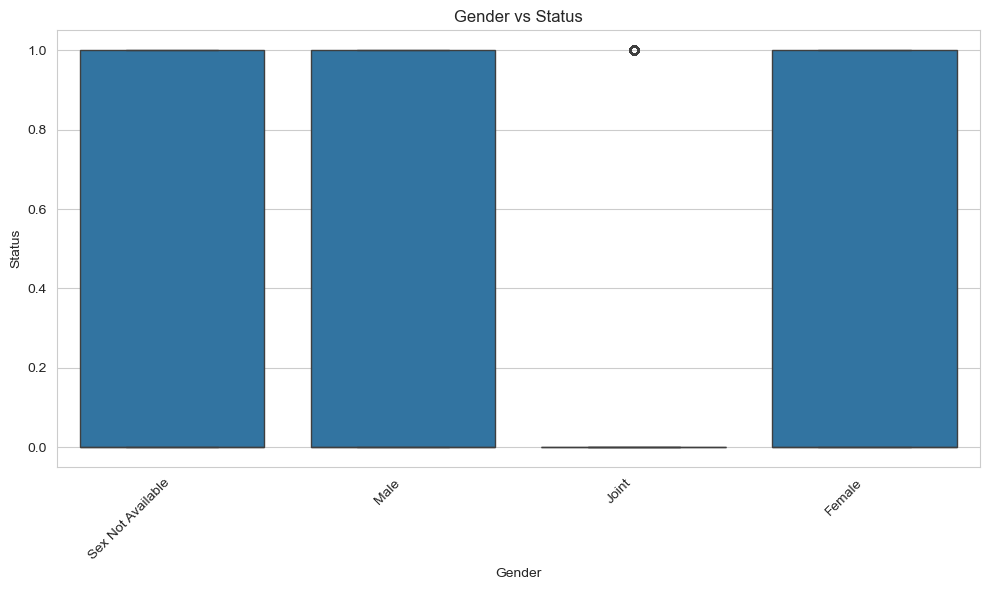

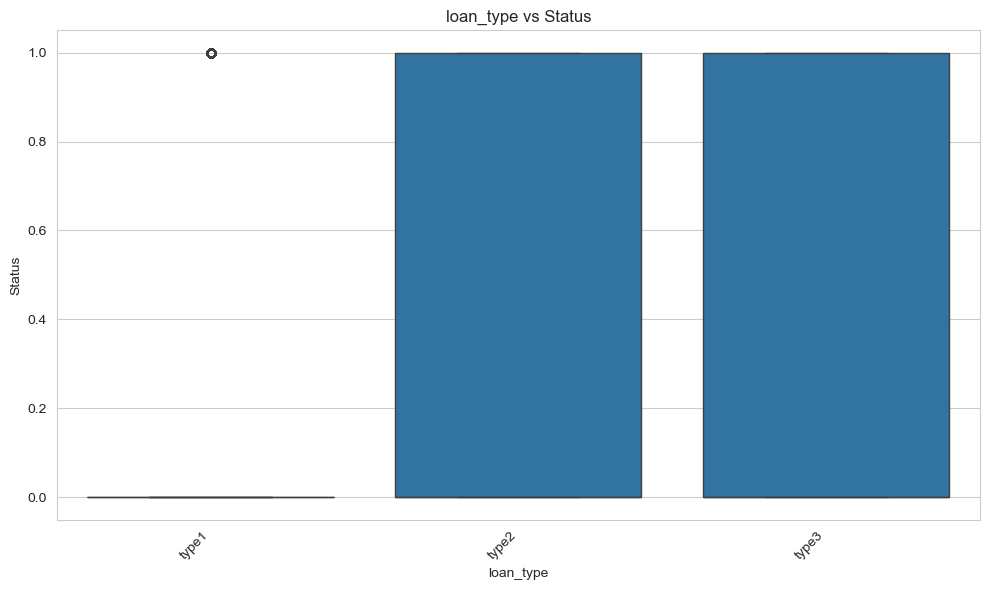

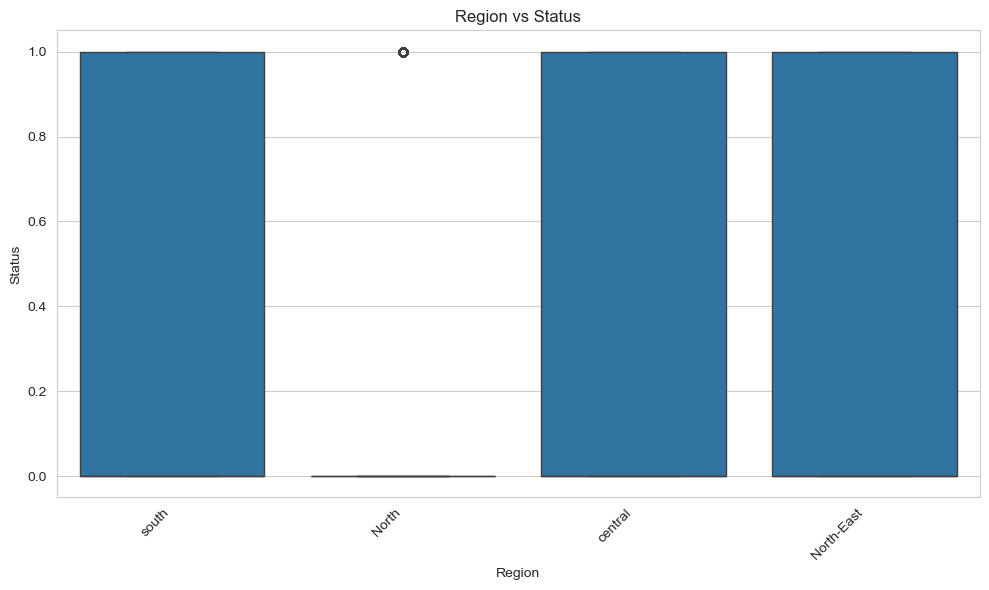

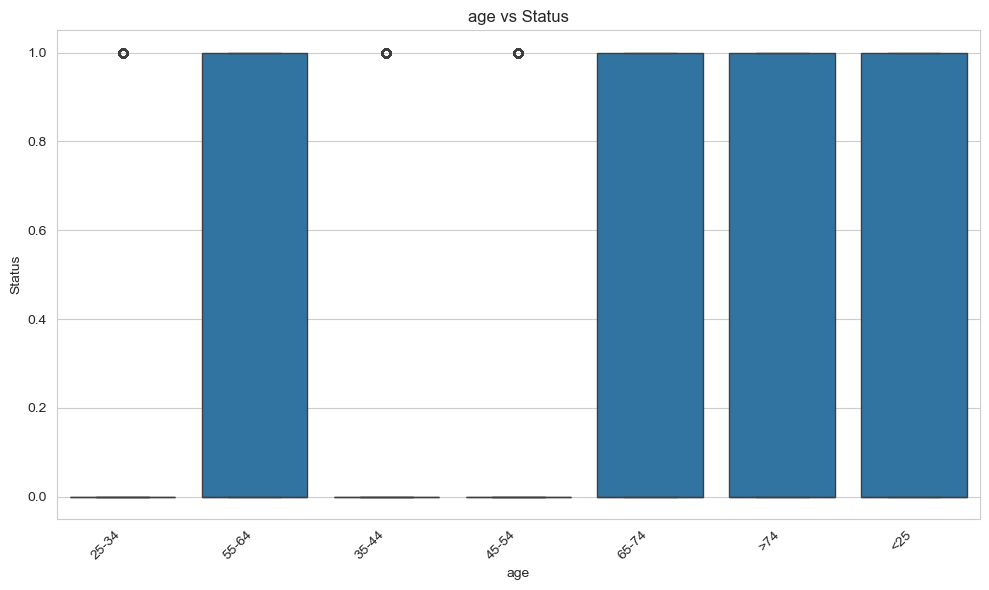

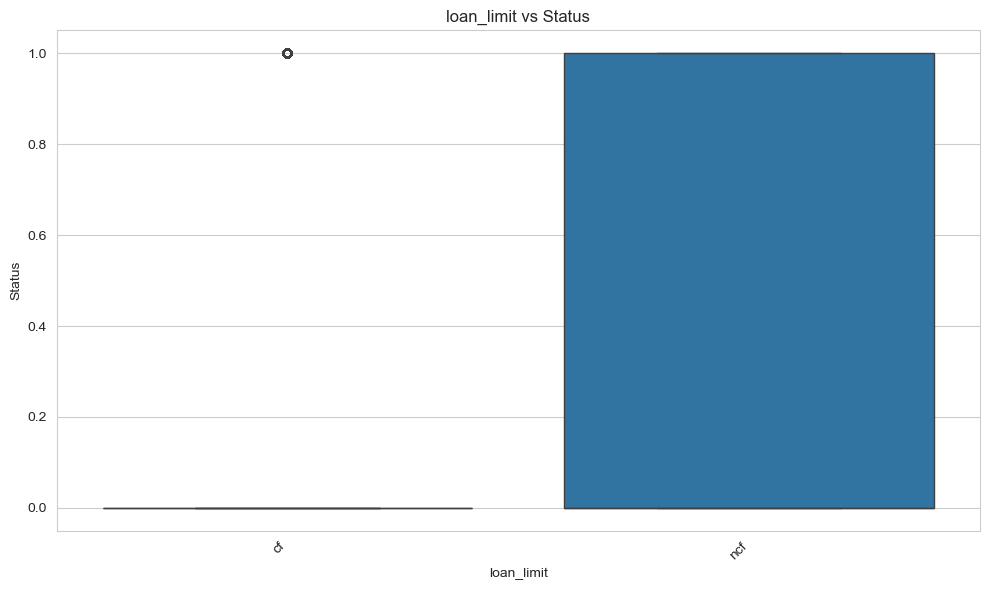

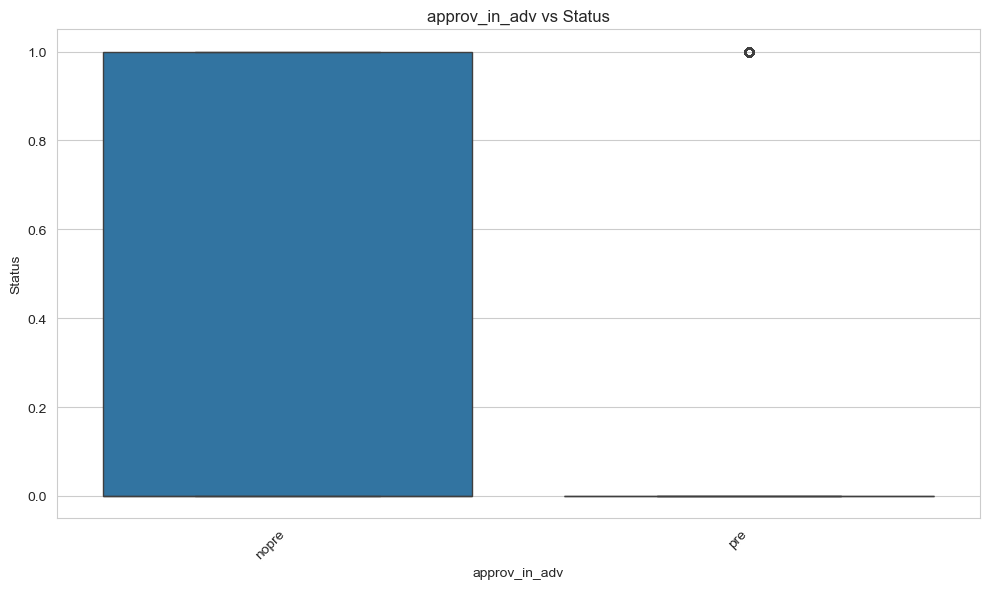

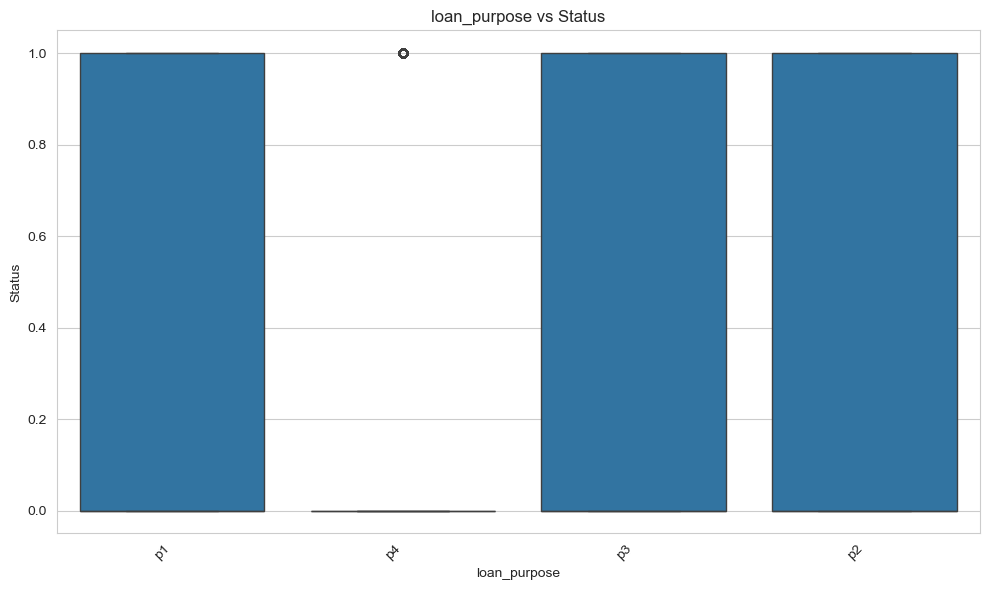

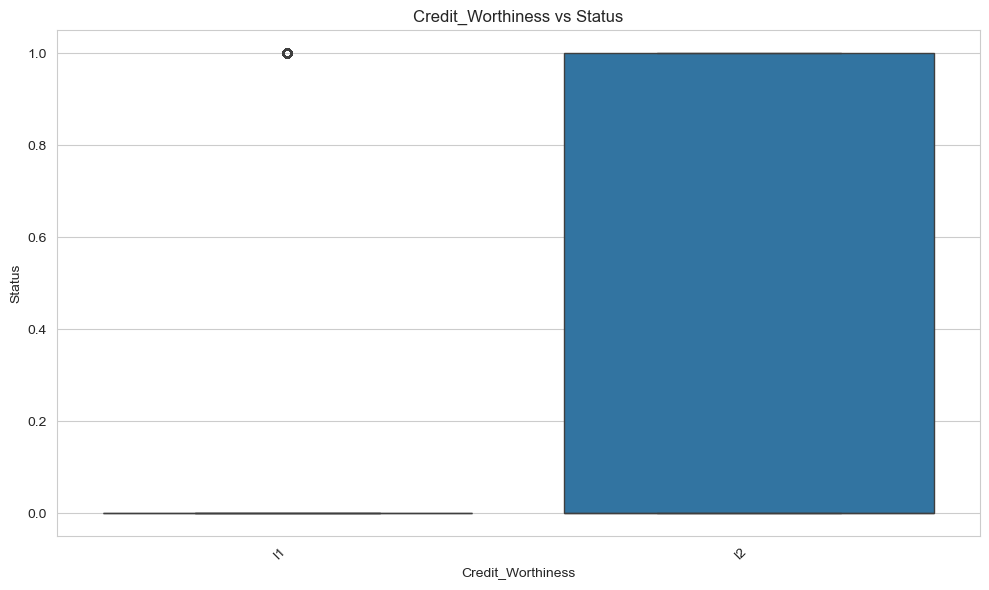

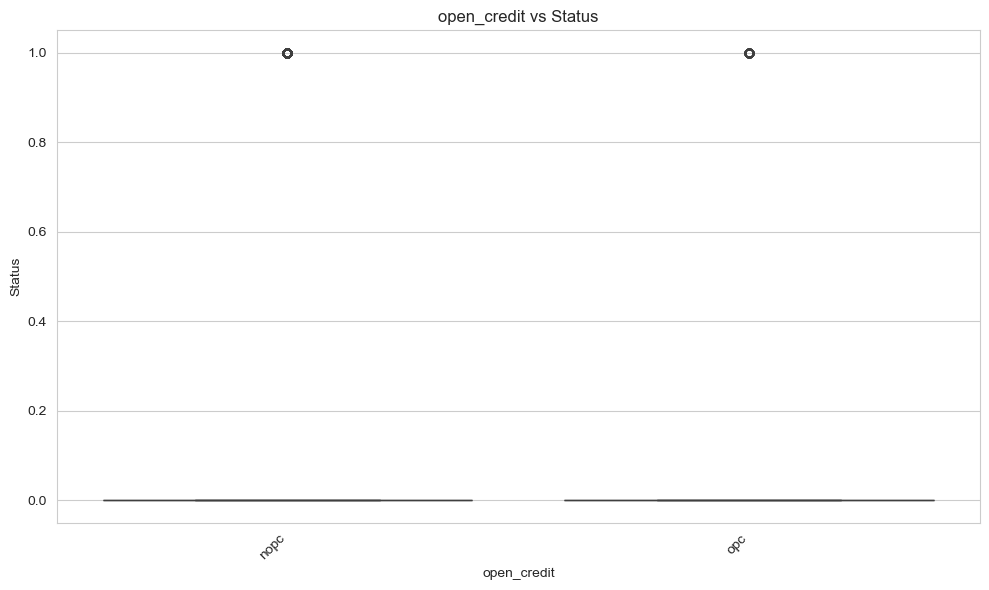

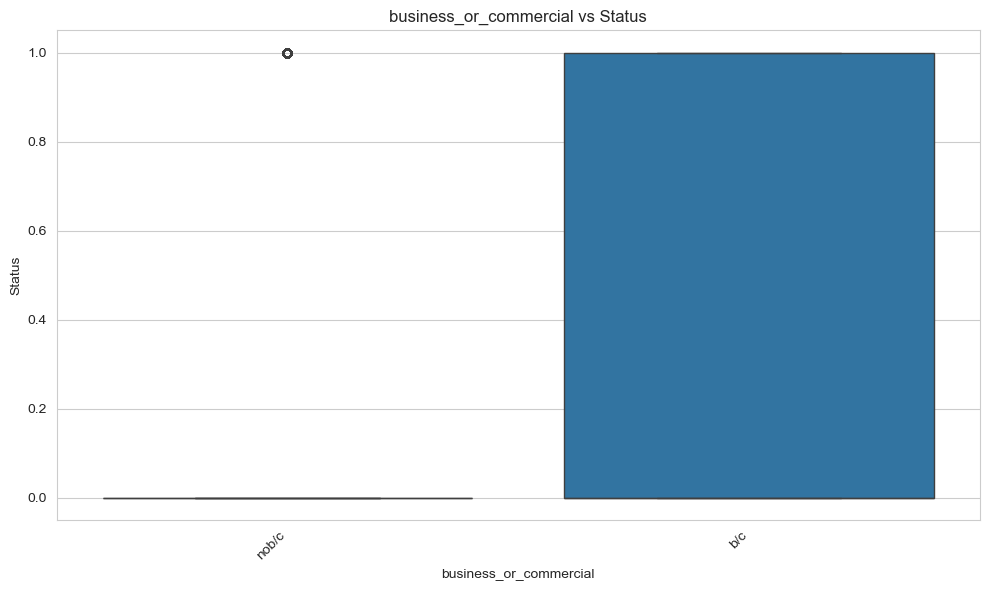

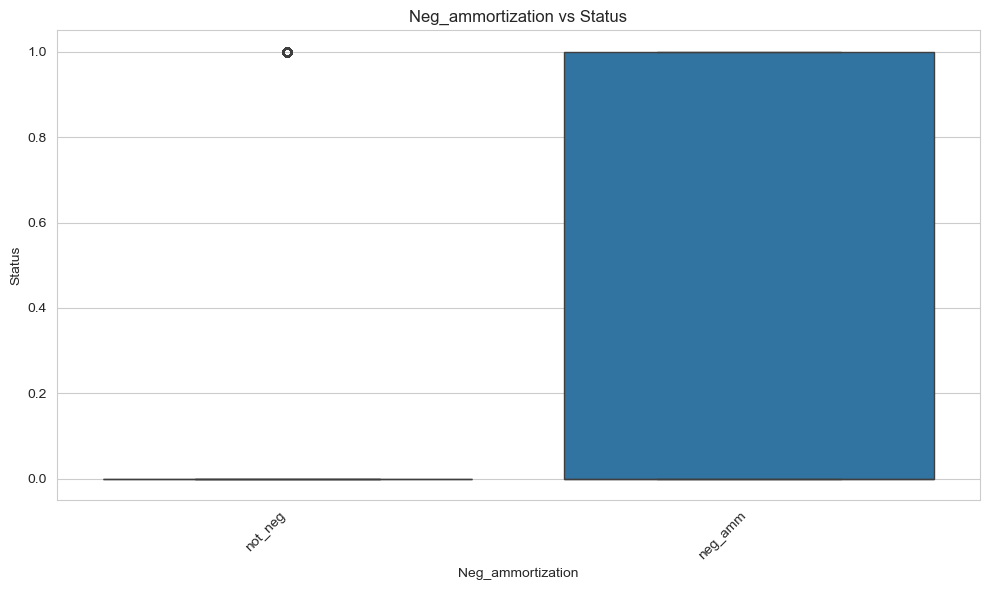

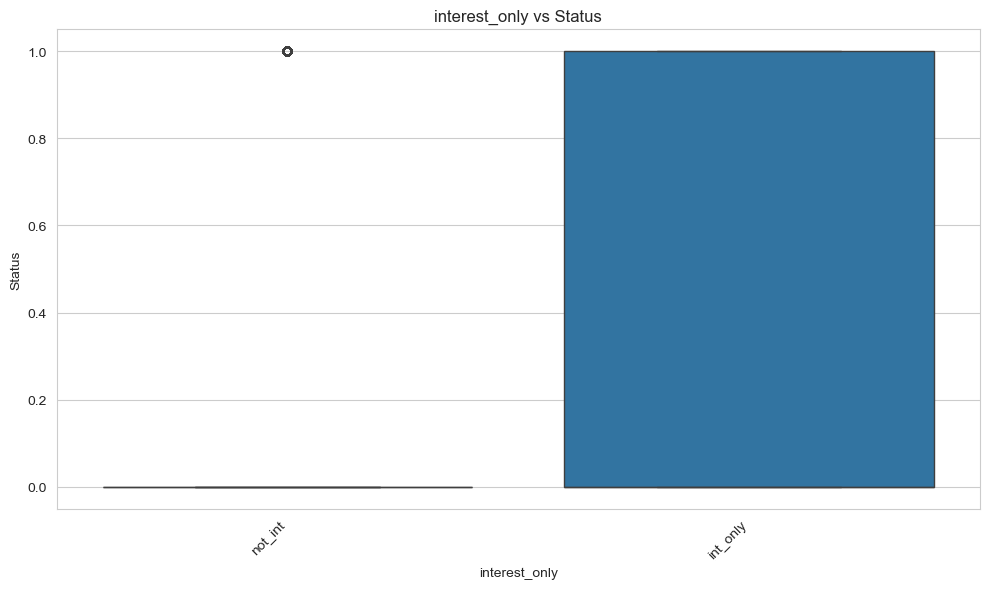

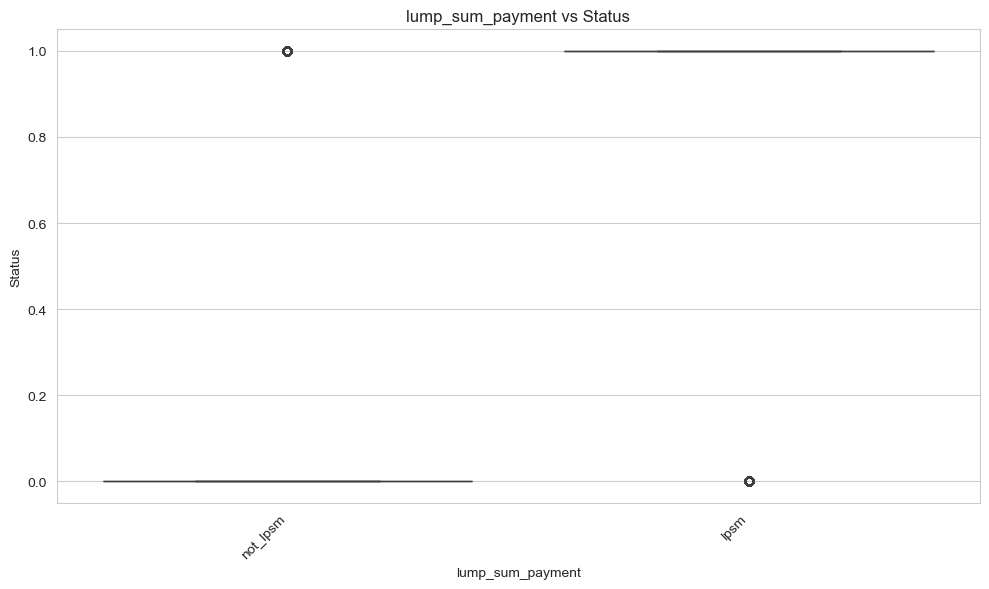

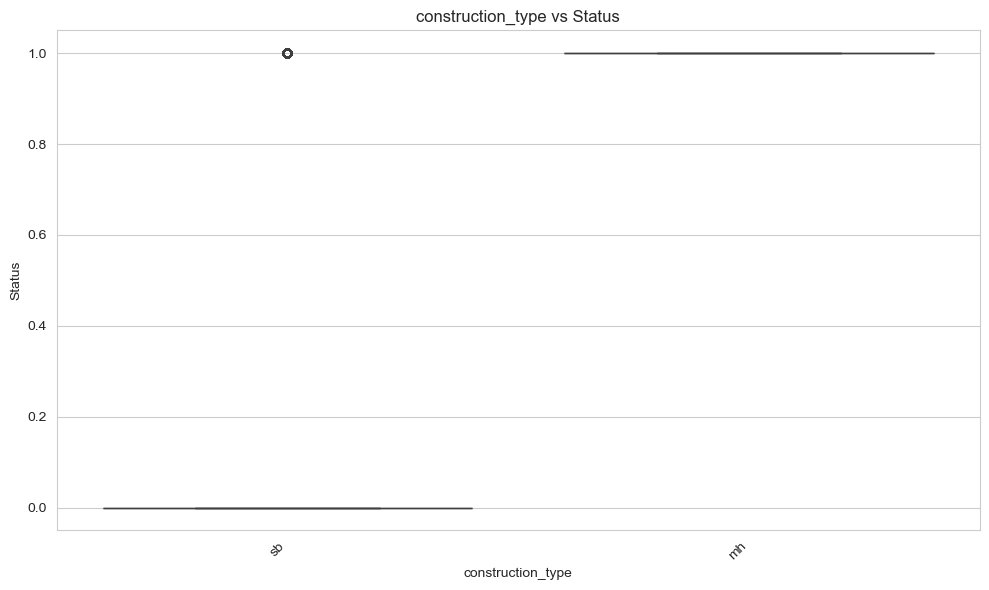

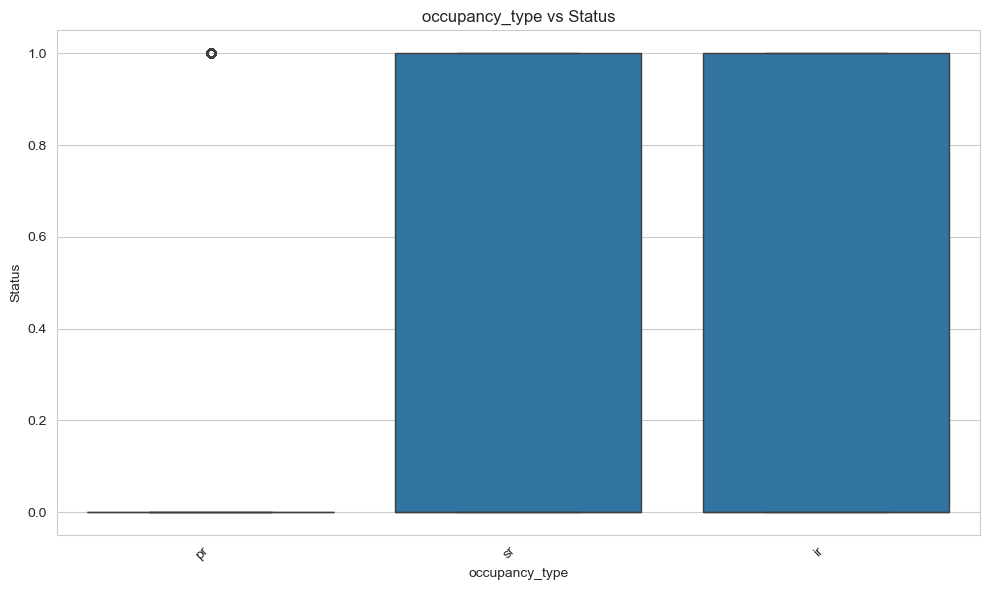

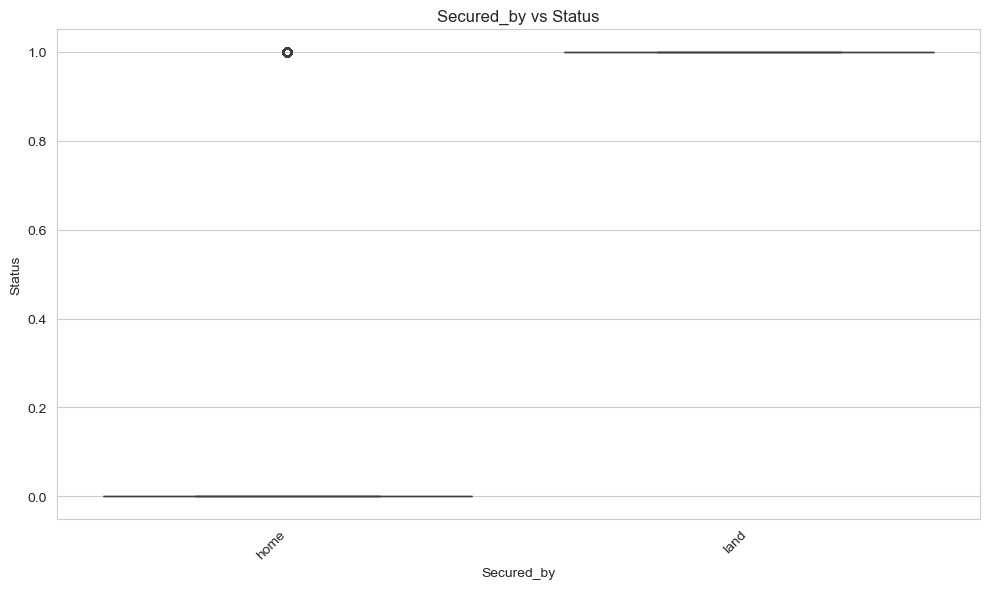

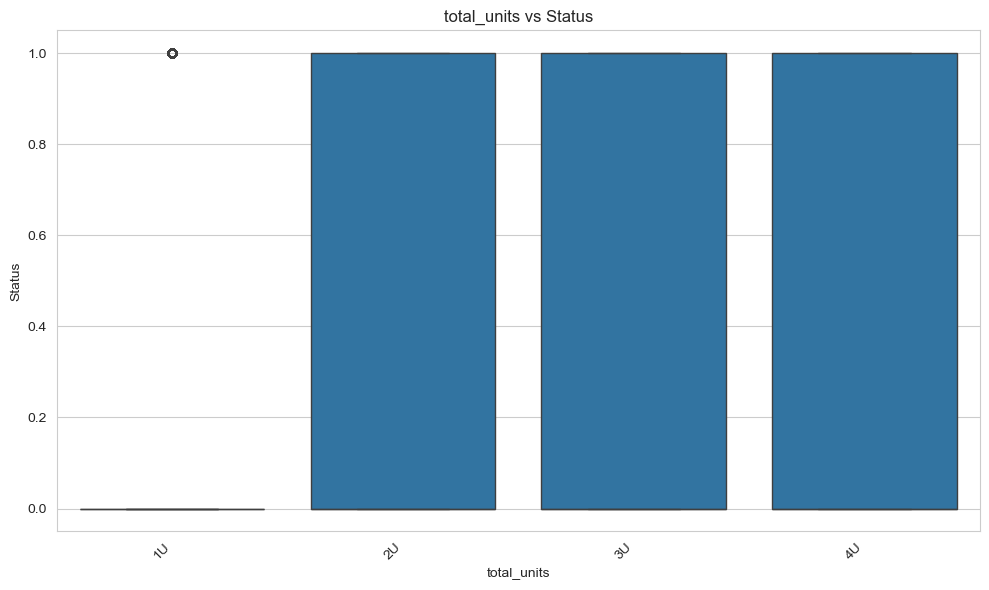

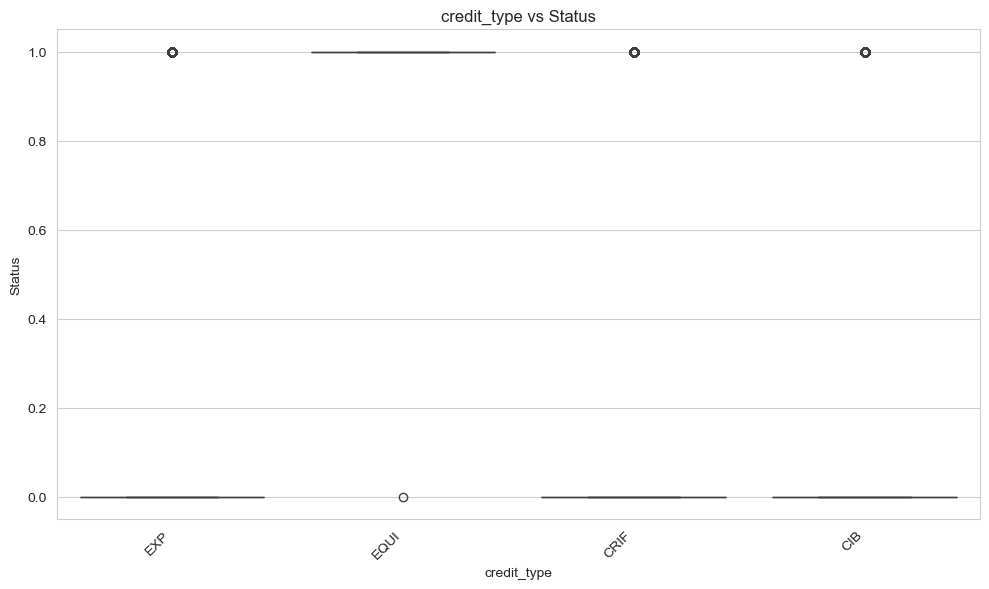

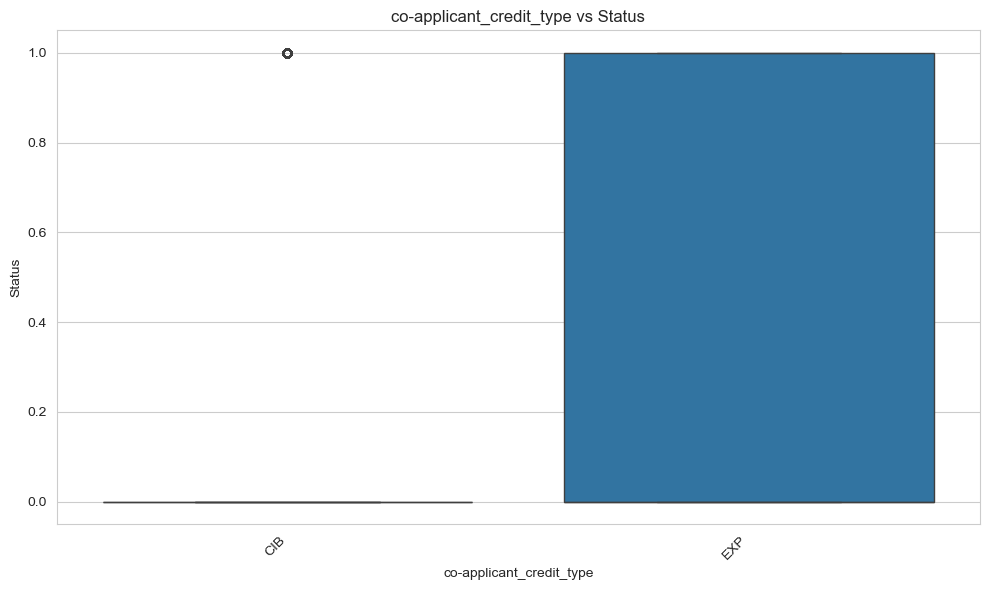

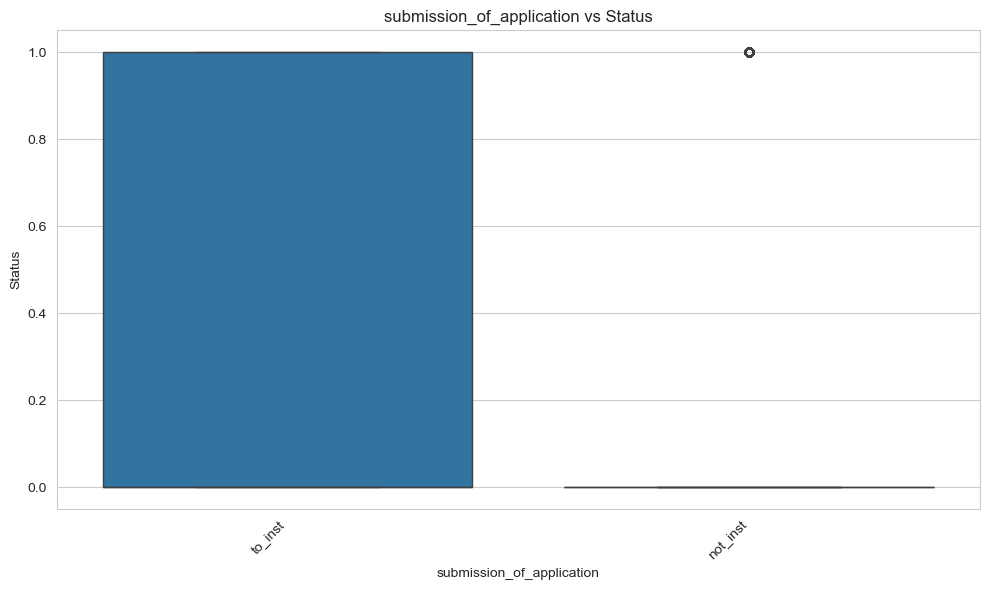

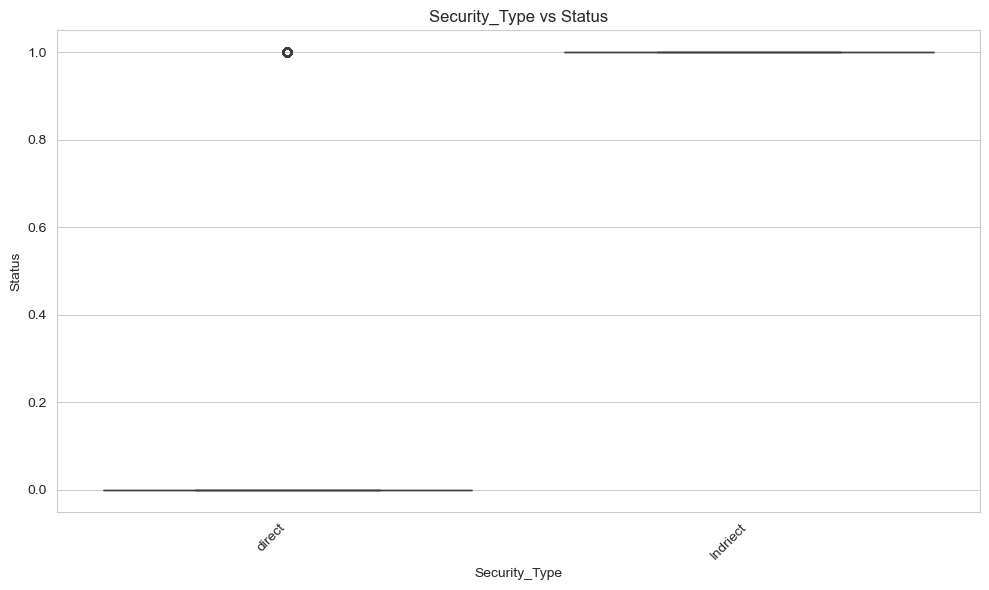

In [17]:
categorical_features = ['Gender', 'loan_type', 'Region', 'age', 'loan_limit', 'approv_in_adv', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'submission_of_application', 'Security_Type']

for col in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=col, y='Status')
    plt.title(f'{col} vs Status')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

**Reasoning**:
Create visualizations to explore the relationships between important numerical features.



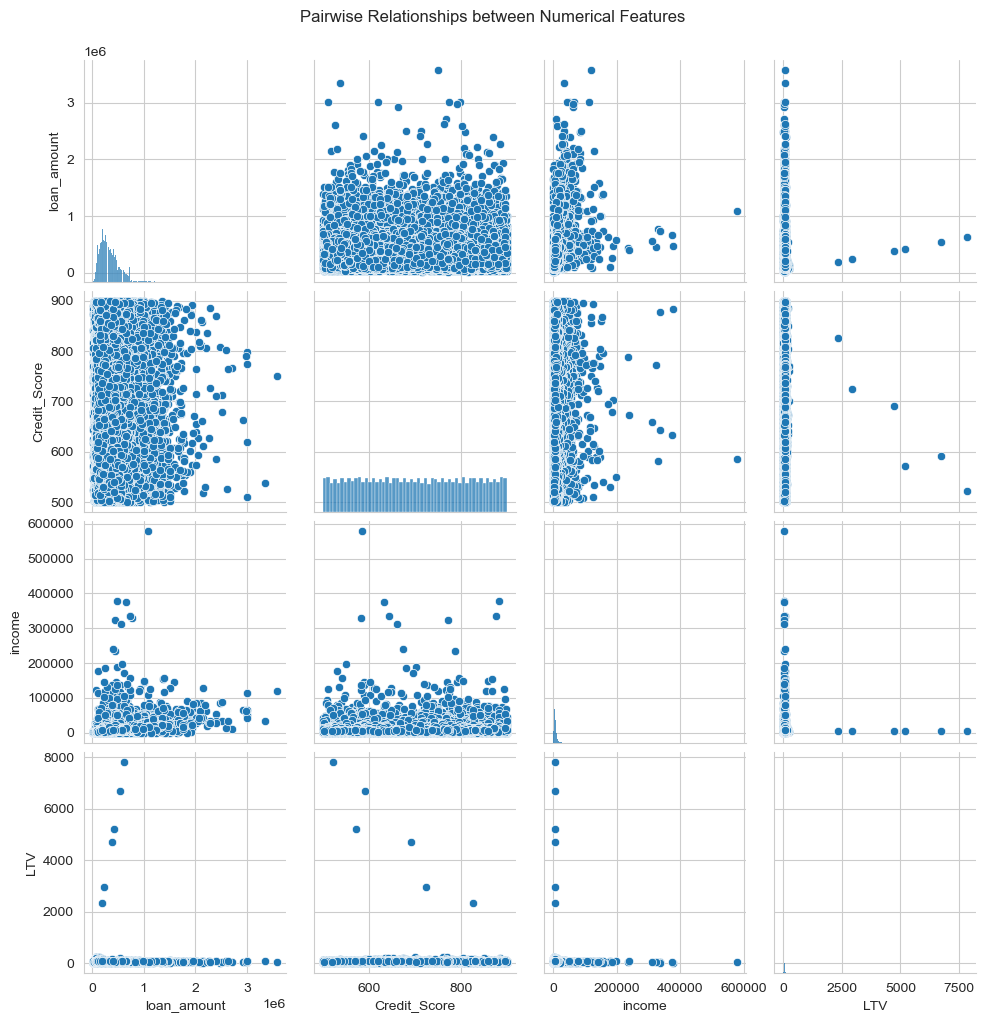

In [18]:
numerical_features = ['loan_amount', 'Credit_Score', 'income', 'LTV']

# Plotting pairs of numerical features
sns.pairplot(df[numerical_features])
plt.suptitle('Pairwise Relationships between Numerical Features', y=1.02)
plt.show()



**Reasoning**:
Generate visualizations to explore the relationships between important categorical features using stacked bar plots or heatmaps of cross-tabulations.



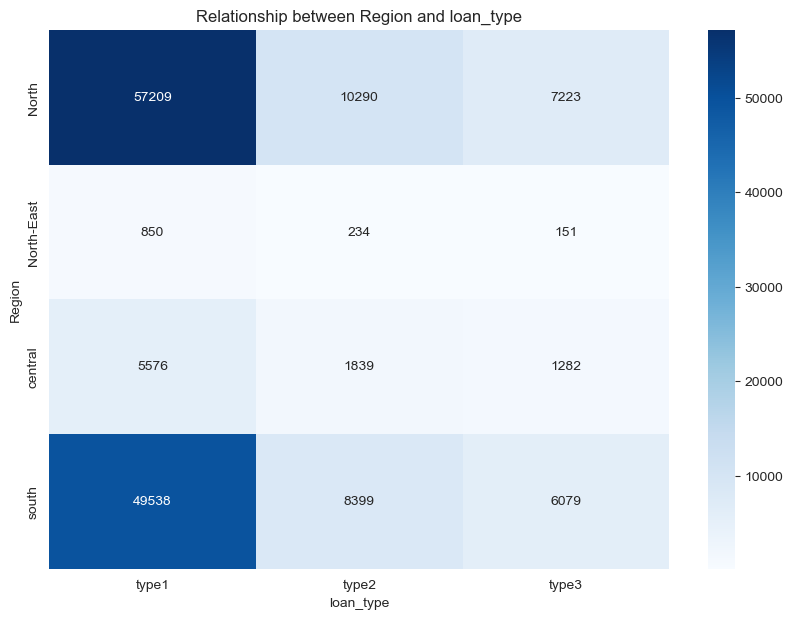

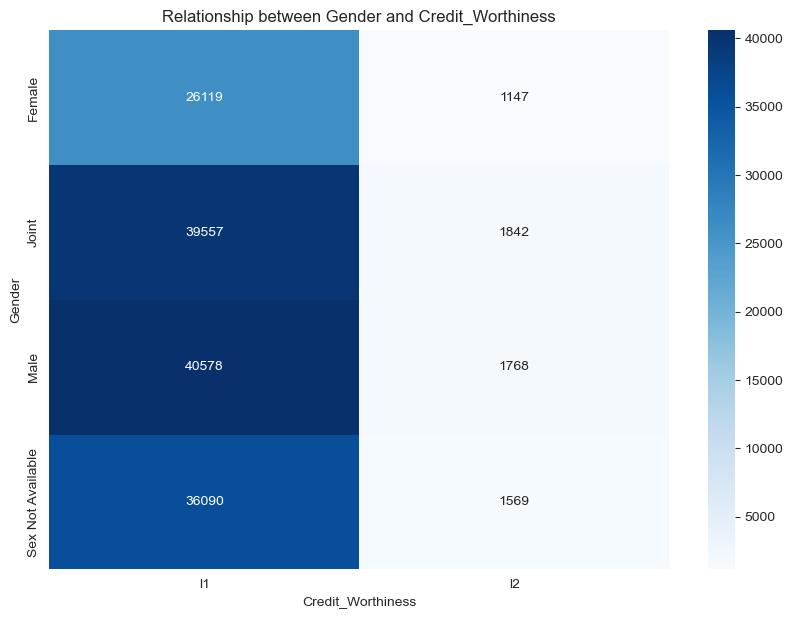

<Figure size 1000x600 with 0 Axes>

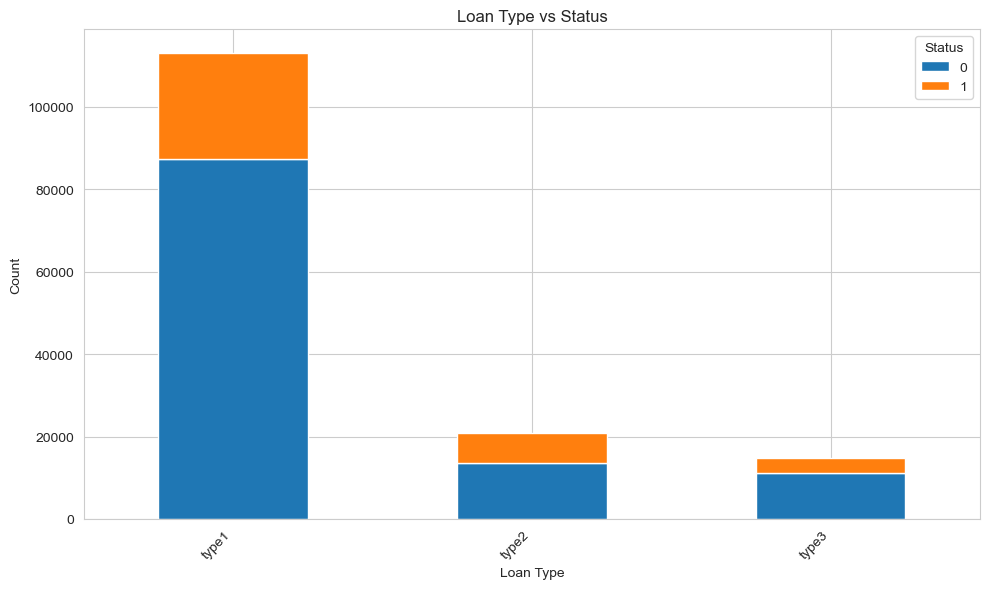

<Figure size 1000x600 with 0 Axes>

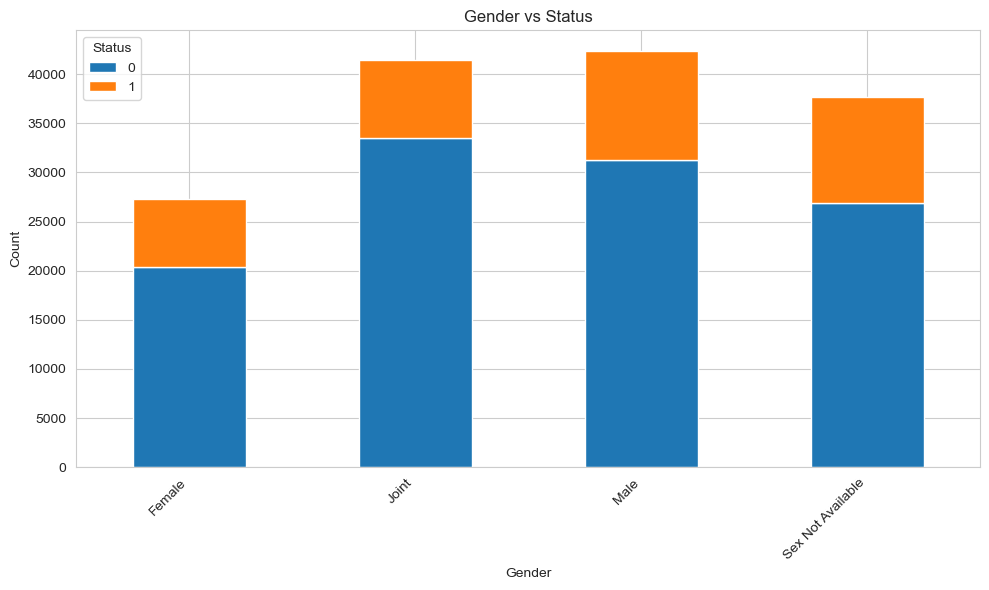

In [19]:
# Create cross-tabulations and visualize using heatmaps
categorical_pairs = [('Region', 'loan_type'), ('Gender', 'Credit_Worthiness')]

for cat1, cat2 in categorical_pairs:
    plt.figure(figsize=(10, 7))
    cross_tab = pd.crosstab(df[cat1], df[cat2])
    sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Relationship between {cat1} and {cat2}')
    plt.xlabel(cat2)
    plt.ylabel(cat1)
    plt.show()

# Create stacked bar plots for other categorical relationships
#  Loan Type vs. Status
plt.figure(figsize=(10, 6))
ct_loan_type_status = pd.crosstab(df['loan_type'], df['Status'])
ct_loan_type_status.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Loan Type vs Status')
plt.xlabel('Loan Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Status')
plt.tight_layout()
plt.show()

#: Gender vs. Status
plt.figure(figsize=(10, 6))
ct_gender_status = pd.crosstab(df['Gender'], df['Status'])
ct_gender_status.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Gender vs Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Status')
plt.tight_layout()
plt.show()

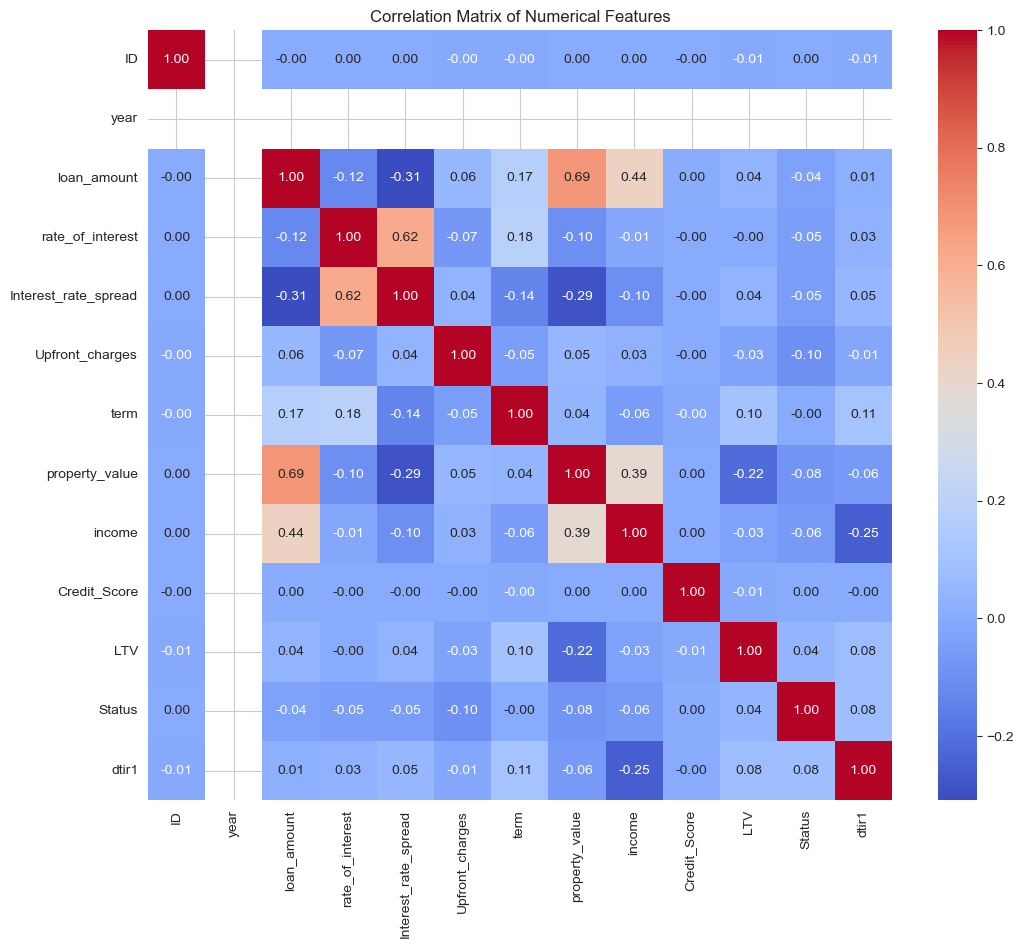

In [20]:
# Calculate the correlation matrix for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_cols].corr()

# Create a heatmap visualization of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Reasoning**:
Investigate relationships among a combination of numerical and categorical features that appear relevant based on the previous bivariate analysis, using visualizations like grouped box plots or facet grids.



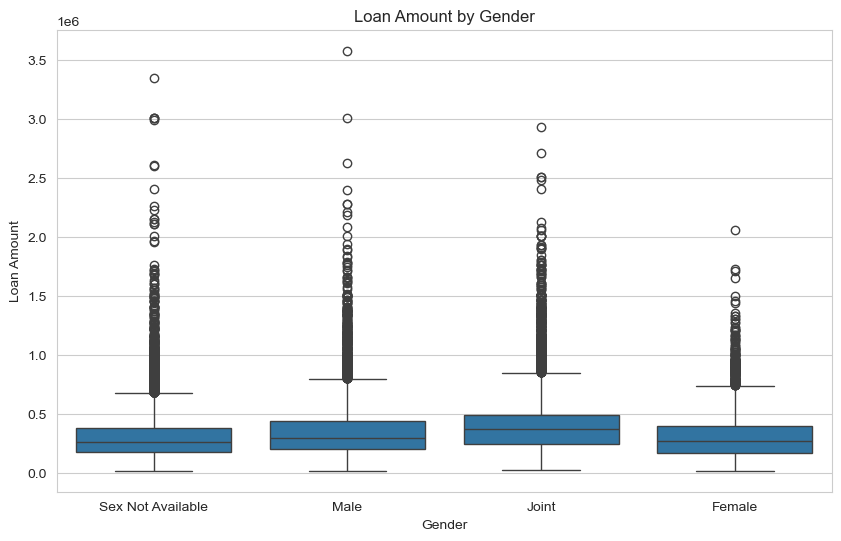

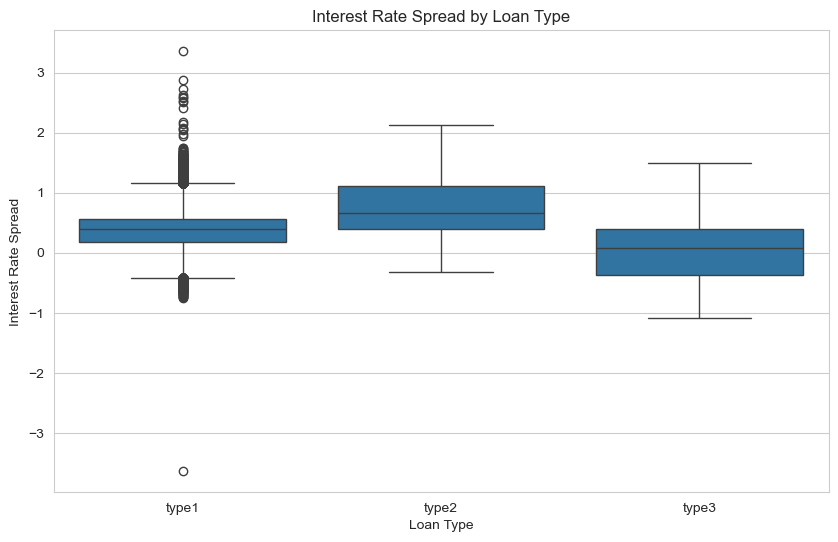

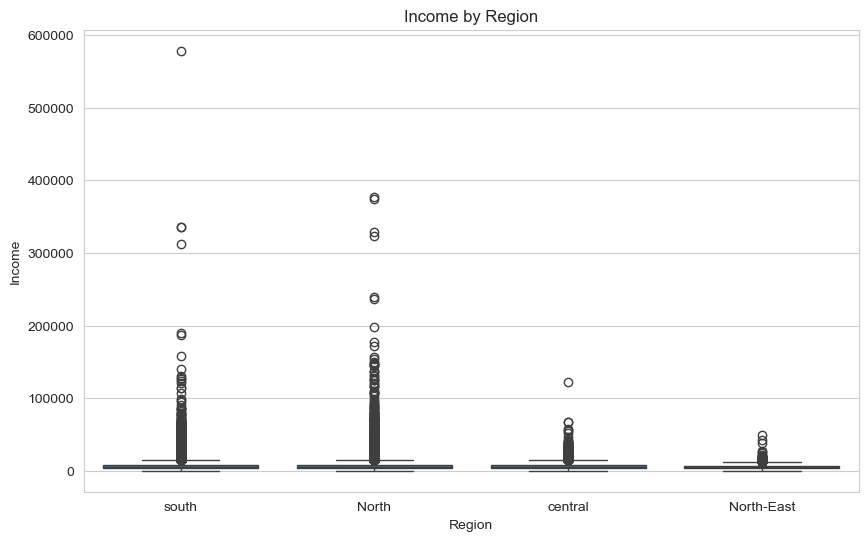

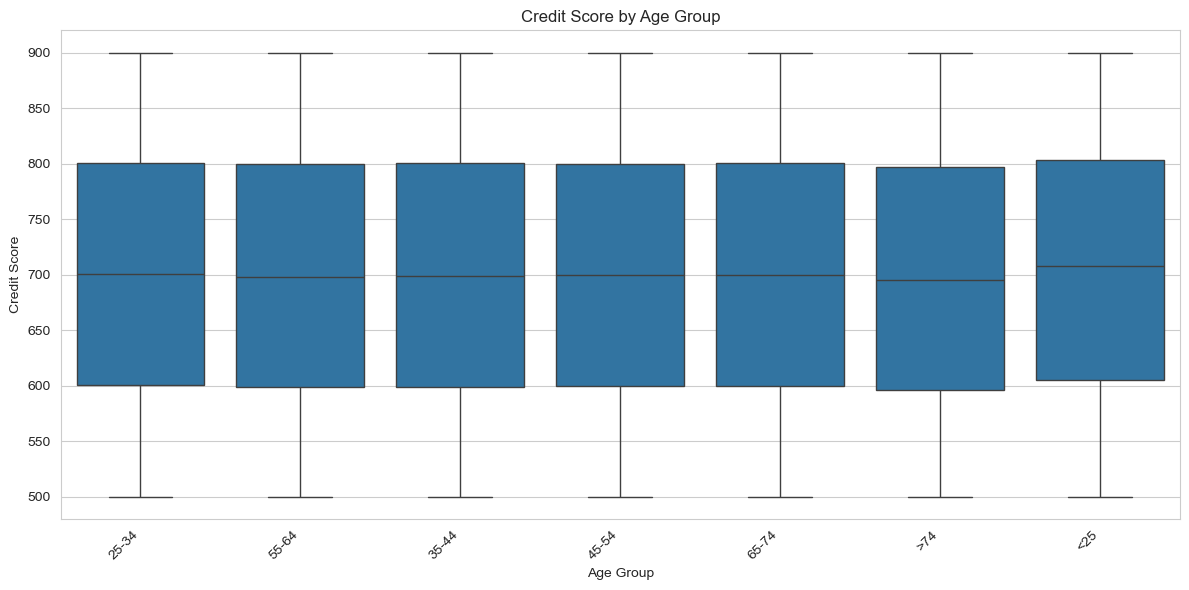

In [21]:
# Investigate relationships between categorical features and numerical features using box plots

# Relationship between Gender and loan_amount
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='loan_amount')
plt.title('Loan Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Loan Amount')
plt.show()

# Relationship between loan_type and Interest_rate_spread
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='loan_type', y='Interest_rate_spread')
plt.title('Interest Rate Spread by Loan Type')
plt.xlabel('Loan Type')
plt.ylabel('Interest Rate Spread')
plt.show()

#  Relationship between Region and income
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Region', y='income')
plt.title('Income by Region')
plt.xlabel('Region')
plt.ylabel('Income')
plt.show()

# Relationship between age and Credit_Score
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='age', y='Credit_Score')
plt.title('Credit Score by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Credit Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

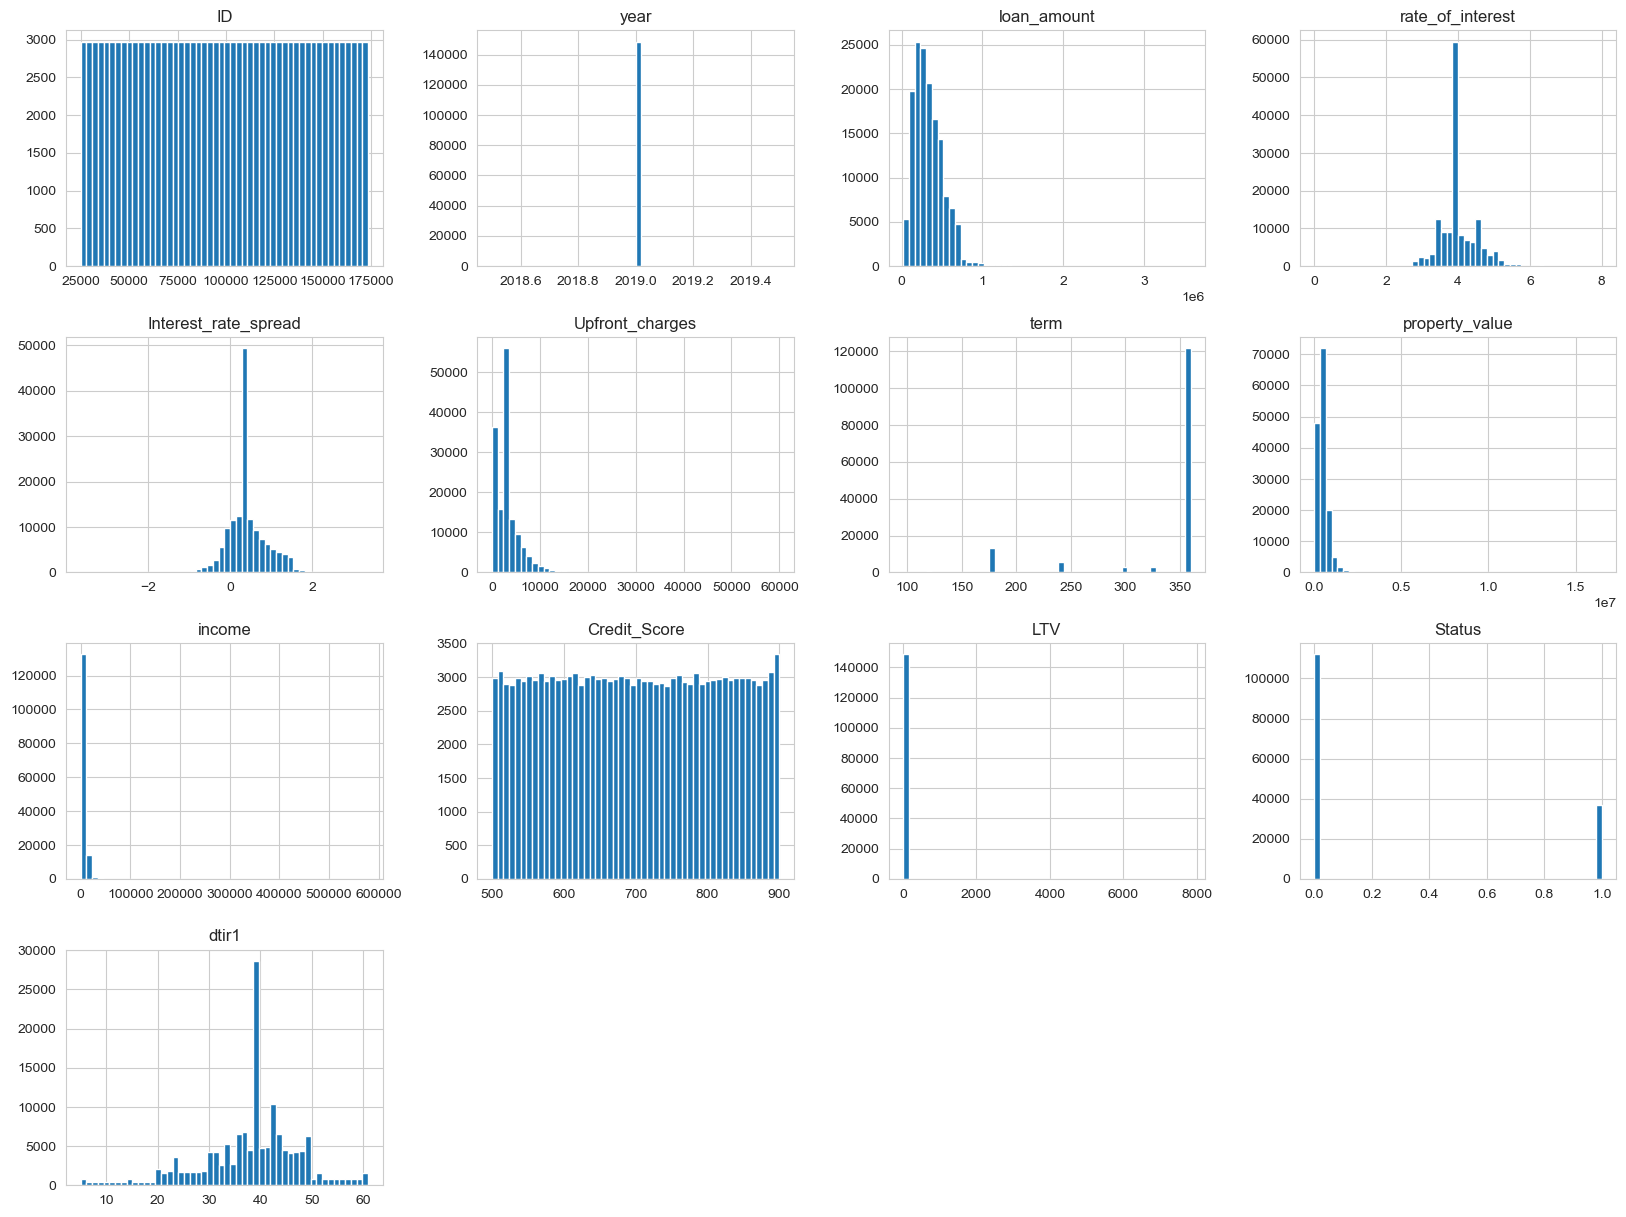

In [22]:
# Numerical data histogram to show the distribution  balance of data and ranges
df.hist(bins = 50, figsize = (20, 15))
plt.show()

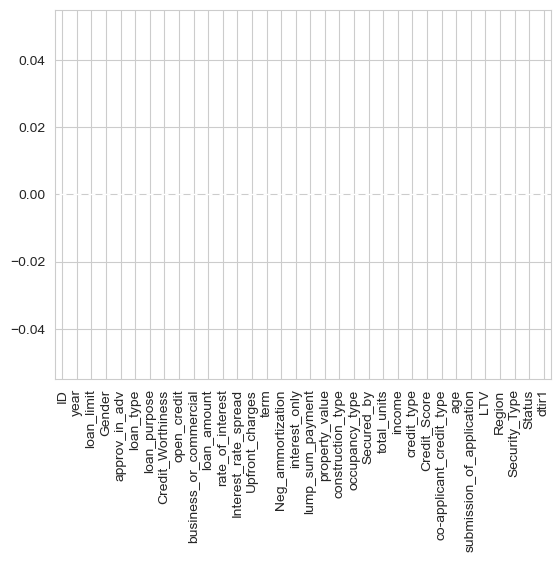

In [23]:
df.isna().sum().plot.bar()
plt.show()

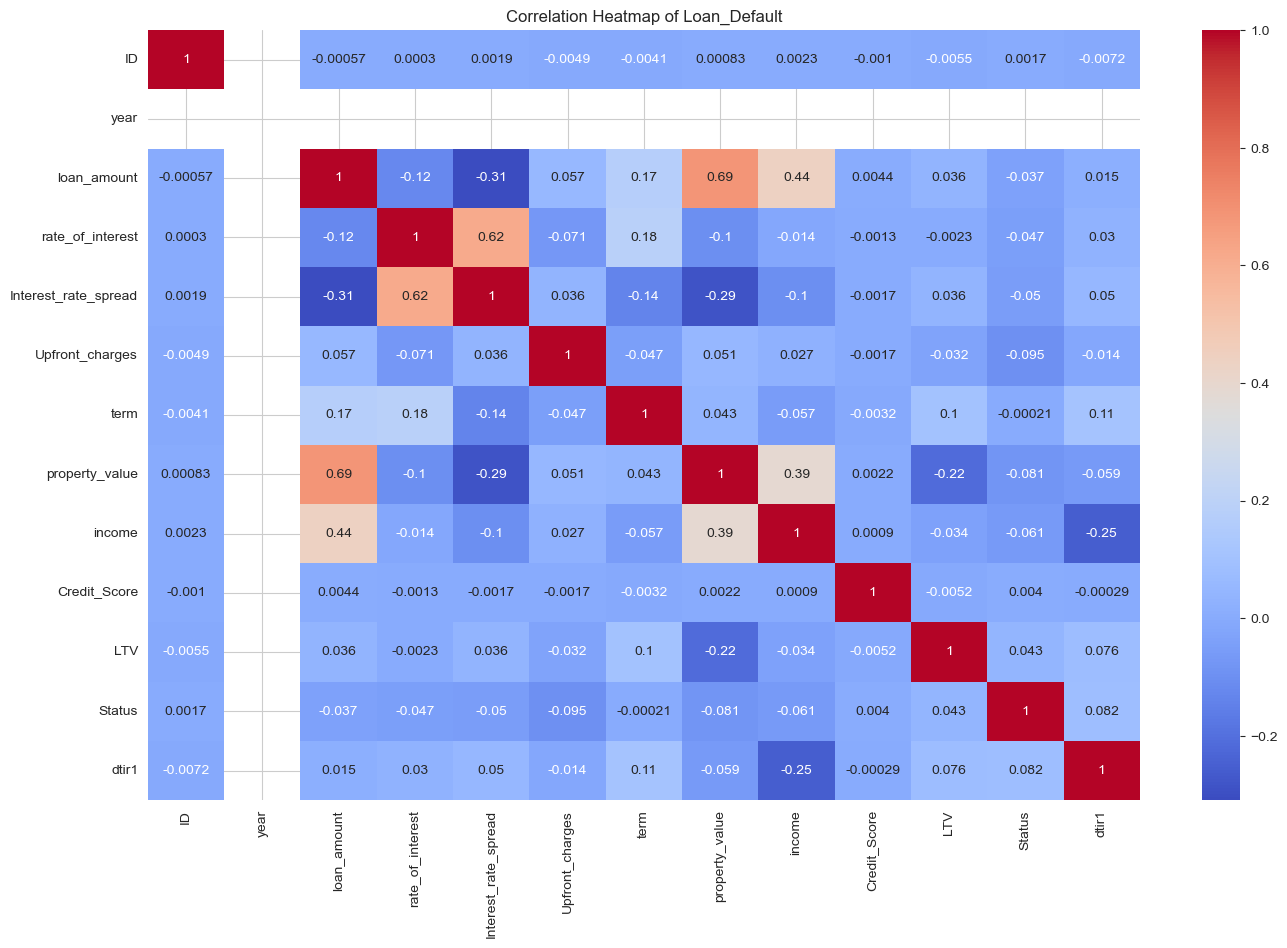

In [24]:
#heat map for the numerical columns

numerical_cols = df.select_dtypes(include=['number'])

correlation_matrix = numerical_cols.corr()


plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Loan_Default')
plt.show()

ID                         Axes(0.125,0.747241;0.227941x0.132759)
year                    Axes(0.398529,0.747241;0.227941x0.132759)
loan_amount             Axes(0.672059,0.747241;0.227941x0.132759)
rate_of_interest           Axes(0.125,0.587931;0.227941x0.132759)
Interest_rate_spread    Axes(0.398529,0.587931;0.227941x0.132759)
Upfront_charges         Axes(0.672059,0.587931;0.227941x0.132759)
term                       Axes(0.125,0.428621;0.227941x0.132759)
property_value          Axes(0.398529,0.428621;0.227941x0.132759)
income                  Axes(0.672059,0.428621;0.227941x0.132759)
Credit_Score                Axes(0.125,0.26931;0.227941x0.132759)
LTV                      Axes(0.398529,0.26931;0.227941x0.132759)
Status                   Axes(0.672059,0.26931;0.227941x0.132759)
dtir1                          Axes(0.125,0.11;0.227941x0.132759)
dtype: object

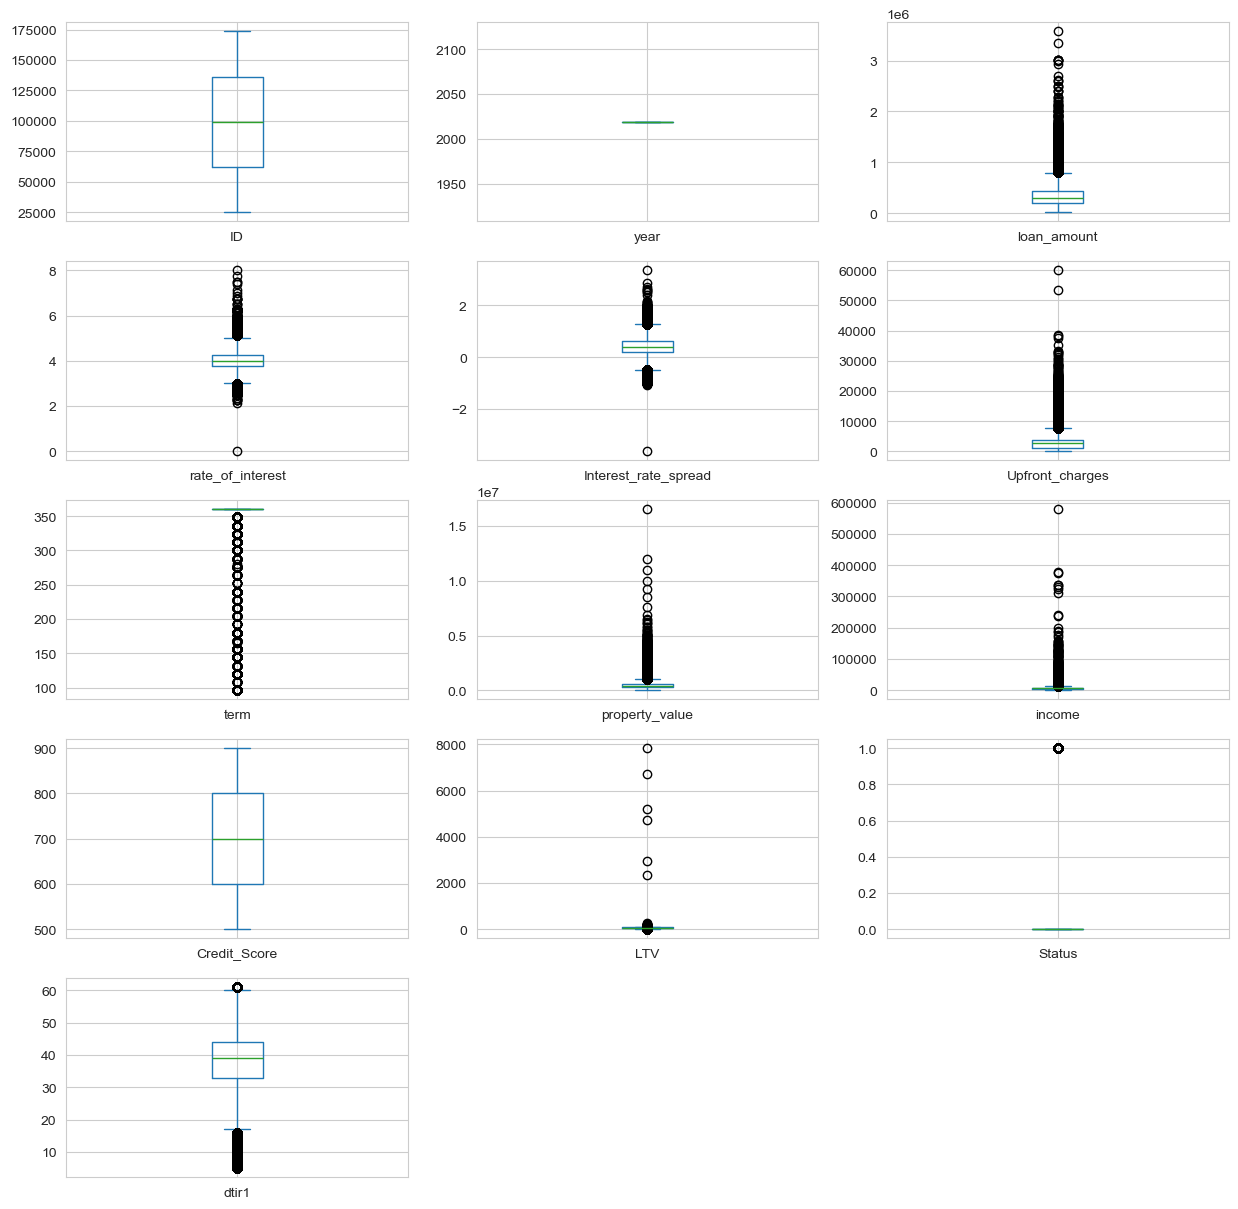

In [25]:
df.plot(kind="box",subplots=True,layout=(5,3),figsize=(15,15))

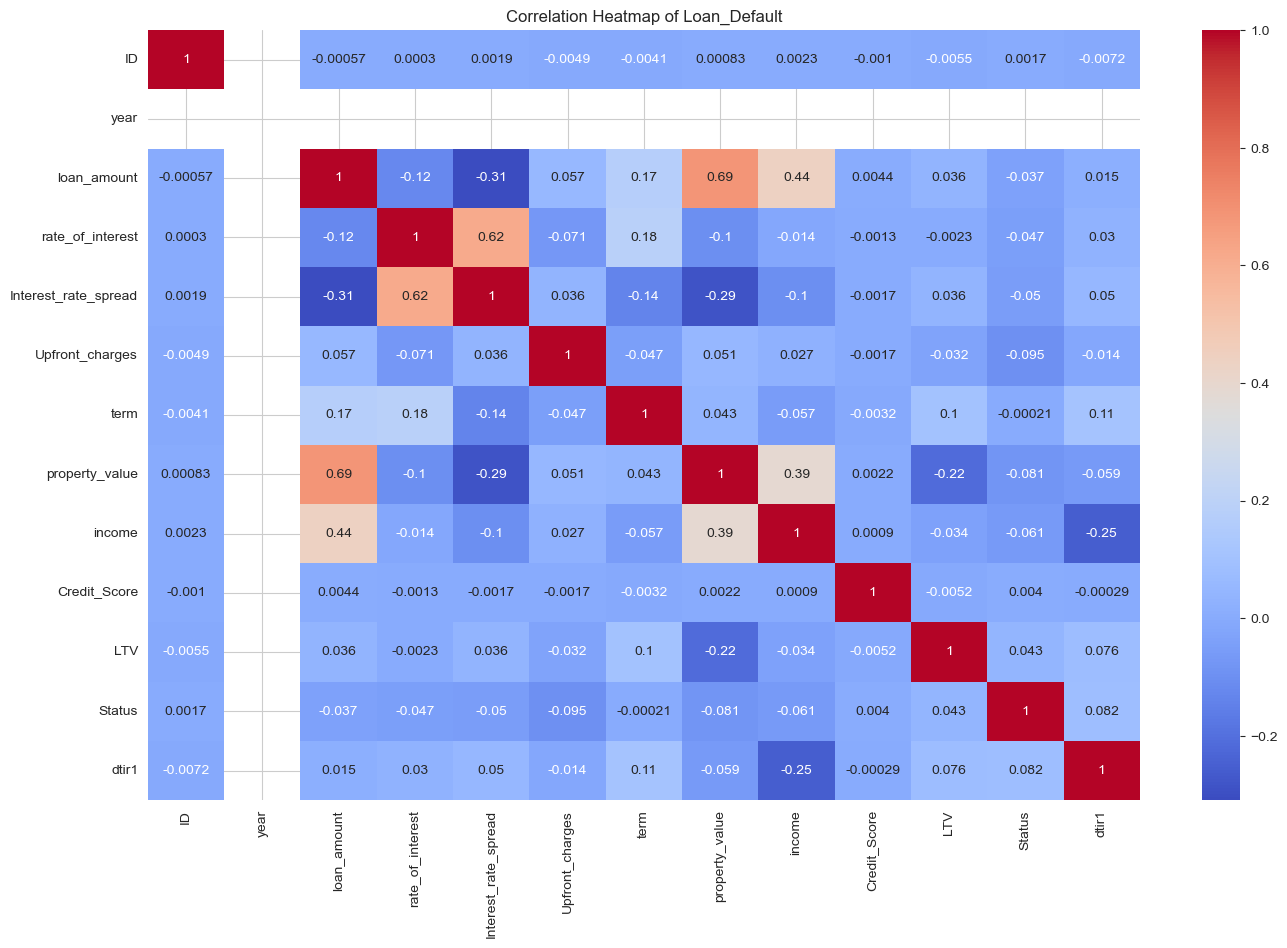

In [26]:
# heatmap for all features after encoding categorical data
numerical_cols = df.select_dtypes(include=['number'])


correlation_matrix = numerical_cols.corr()


plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Loan_Default')
plt.show()